# Interactive Bath Model Analysis

This notebook provides an interactive analysis of different bosonic bath models used in quantum optics and open quantum systems. It allows comparison between different bath types and their spectral properties.

## Table of Contents
1. [Setup and Imports](#setup)
2. [Bath Model Definitions](#definitions)
3. [Interactive Parameter Controls](#controls)
4. [Bath Comparison Analysis](#comparison)
5. [Temperature Effects](#temperature)
6. [Correlation Function Analysis](#correlation)

### Discussion: Units of Spectral Density in Different Conventions
$J(\omega)$ describes the spectral density of environmental modes at a given frequency $\omega$ and how strongly these modes couple to the system.
In the [paper](https://pubs.aip.org/aip/jcp/article/124/23/234505/930637/Two-dimensional-optical-three-pulse-photon-echo), **spectroscopic units of cm⁻¹** are used for transition frequencies ("wavenumbers"). The spectral density is defined as:
$$
J(\omega) = \alpha^2 \frac{\omega}{\omega_c} \exp\left(-\frac{\omega}{\omega_c}\right)
$$
where:
- $\alpha$ is the dimensionless coupling strength,
- $\omega_c$ is the cutoff frequency,
- $\omega$ is the frequency.

**Units:**  
- $J(\omega)$ is dimensionless in this context.


In **QuTiP**, the Ohmic spectral density is typically written as:
$$
J(\omega) = \alpha \frac{\omega^s}{\omega_c^{s-1}} \exp\left(-\frac{\omega}{\omega_c}\right)
$$
For the Ohmic case ($s = 1$):
$$
J(\omega) = \alpha \omega \exp\left(-\frac{\omega}{\omega_c}\right)
$$
where:
- $\alpha$ is the dimensionless coupling strength,
- $\omega_c$ is the cutoff frequency,
- $\omega$ is the frequency.

**Units:**  
- $J(\omega)$ now has units of frequency ($[\omega]$).


#### Physical Meaning

According to [Wikipedia](https://en.wikipedia.org/wiki/Spectral_density), the spectral density $J(\omega)$ represents the **amount of Power per unit frequency range**. ---

**References:**  
- Weiss, U. (2012). Quantum Dissipative Systems.

$$
H_{\text{SB}} = \Sigma_i F_i Aᵢ
$$

$$
[\mathbf{A}_i] =  \left[\mu\right] = 1  \quad \text{(dimensionless (in the paper))}
$$

$$
[H_{\text{SB}}] = \left[J\right] = \left[eV\right]
$$

Then:
$$
[F_i] = \left[ J\right] = \left[eV\right]
$$

And:
$$
[g_x^i] = \left[ J\right] = \left[eV\right] = \left[ \omega\right] \text{(because [HBAR]=1)}
$$

$$
[J_i(\omega)] = [g_x^{i\,2} \, \delta(\omega)] = \left[\omega\right] \text{(matches the Qutip definition)}
$$
But now:
$$
[J(\omega)] = [\alpha^2] ?=? \left[\omega^2\right]
$$


**Actually the coupling constant in the paper is Not dimensionless**


## Bath Model Definitions

We analyze three main types of bosonic baths:

1. **Paper Bath**: Exponential cutoff spectral density as used in the research paper
2. **Ohmic Bath**: Power-law spectral density with exponential cutoff  
3. **Drude-Lorentz Bath**: Lorentzian spectral density commonly used in condensed matter

Each bath is characterized by its spectral density $J(\omega)$ and Power spectrum $S(\omega)$.

In [1]:

from pathlib import Path
custom_dir = Path("test_baths")
custom_dir.mkdir(exist_ok=True)

from plotstyle.style import init_style, COLORS, LINE_STYLES, MARKERS, save_fig

# Initialize matplotlib/LaTeX style once
init_style()

# BATH MODEL CONSTANTS AND PARAMETERS (UPDATED)

# Default parameter sets for different bath types
cutoff = 100.0  # Bath cutoff frequency
temp = 1e2  # Bath temperature
alpha = 1  # Coupling strength
s_ohm = 1.0  # Ohmicity parameter
s_sub_ohm = 0.8
s_super_ohm = 1.2
from qspectro2d.core.bath_system.bath_fcts import (
    spectral_density_func_drude_lorentz,
    power_spectrum_func_drude_lorentz,
    spectral_density_func_ohmic,
    power_spectrum_func_ohmic,
    spectral_density_func_paper,
    power_spectrum_func_paper,
)
from qutip import BosonicEnvironment, OhmicEnvironment, DrudeLorentzEnvironment
import numpy as np
import matplotlib.pyplot as plt

# Display default bath parameters
print("🔧 Default bath parameters loaded:")
print(f"   Temperature: {temp:.1e}")
print(f"   Coupling α: {alpha:.1e}")
print(f"   Cutoff: {cutoff:.1e}")

🔧 Default bath parameters loaded:
   Temperature: 1.0e+02
   Coupling α: 1.0e+00
   Cutoff: 1.0e+02


In [2]:
# compare J(w) paper vs ohmic
print(
    "J(w)", spectral_density_func_ohmic(1, temp=temp, cutoff=cutoff, s=s_ohm, alpha=alpha / cutoff)
)  # NOTE this is now exactly the paper implementation
print("J(w)", spectral_density_func_paper(1, temp=temp, cutoff=cutoff, s=s_ohm, alpha=alpha))

# compare S(w) paper vs ohmic
print(
    "S(w)", power_spectrum_func_ohmic(1, temp=temp, cutoff=cutoff, s=s_ohm, alpha=alpha / cutoff)
)  # NOTE this is now exactly the paper implementation
print("S(w)", power_spectrum_func_paper(1, temp=temp, cutoff=cutoff, alpha=alpha))

J(w) 0.009900498337491681
J(w) 0.009900498337491681
S(w) 1.99001666663891
S(w) 1.99001666663891


In [3]:
# SEPARATE AXIS PLOTS FOR PAPER, OHMIC, AND DRUDE-LORENTZ BATHS
from numpy import s_


dl_env = BosonicEnvironment.from_spectral_density(
    lambda w: spectral_density_func_drude_lorentz(
        w, cutoff=cutoff, temp=temp, alpha=alpha  #  / cutoff
    ),
    wMax=10 * cutoff,
    T=temp,
 )
dl_env_check = DrudeLorentzEnvironment(
    T=temp,
    lam=alpha,  # NOTE / cutoff this is now exactly the paper implementation
    gamma=cutoff,
 )
# Power spectrum and spectral density for each bath
paper_env = BosonicEnvironment.from_spectral_density(
    lambda w: spectral_density_func_paper(w, cutoff=cutoff, temp=temp, alpha=alpha),
    wMax=10 * cutoff,
    T=temp,
 )
bath_ohmic = OhmicEnvironment(
    T=temp,
    wc=cutoff,
    s=s_ohm,
    alpha=alpha,  # NOTE / cutoff this is now exactly the paper implementation
 )

# Frequency range for each bath
omega = np.linspace(-5 * cutoff, 5 * cutoff, 500)
# Time axes for correlation functions
times = np.linspace(-5 / cutoff, 5 / cutoff, 500)

J_func_paper = paper_env.spectral_density
J_func_ohmic = bath_ohmic.spectral_density
J_func_dl = dl_env.spectral_density
J_func_dl_check = dl_env_check.spectral_density

P_func_paper = paper_env.power_spectrum
P_func_ohmic = bath_ohmic.power_spectrum
P_func_dl = dl_env.power_spectrum
P_func_dl_check = dl_env_check.power_spectrum

J_vals_paper = J_func_paper(omega)
P_vals_paper = P_func_paper(omega)
J_vals_ohmic = J_func_ohmic(omega)
P_vals_ohmic = P_func_ohmic(omega)

J_vals_dl = J_func_dl(omega)
P_vals_dl = P_func_dl(omega)
J_vals_dl_check = J_func_dl_check(omega)
P_vals_dl_check = P_func_dl_check(omega)

corr_func_paper = paper_env.correlation_function
corr_func_ohmic = bath_ohmic.correlation_function
corr_func_dl = dl_env.correlation_function
corr_func_dl_check = dl_env_check.correlation_function

corr_paper = corr_func_paper(times)
corr_ohmic = corr_func_ohmic(times)
corr_dl = corr_func_dl(times)
corr_dl_check = corr_func_dl_check(times)

# Sub-Ohmic and Super-Ohmic baths
bath_sub = OhmicEnvironment(
    T=temp,
    wc=cutoff,
    s=s_sub_ohm,
    alpha=alpha,  # / cutoff,
 )
bath_super = OhmicEnvironment(
    T=temp,
    wc=cutoff,
    s=s_super_ohm,
    alpha=alpha,  # / cutoff,
 )

J_func_sub = bath_sub.spectral_density
J_func_super = bath_super.spectral_density

P_func_sub = bath_sub.power_spectrum
P_func_super = bath_super.power_spectrum

J_vals_sub = J_func_sub(omega)
P_vals_sub = P_func_sub(omega)
J_vals_super = J_func_super(omega)
P_vals_super = P_func_super(omega)

corr_func_sub = bath_sub.correlation_function
corr_func_super = bath_super.correlation_function

corr_sub = corr_func_sub(times)
corr_super = corr_func_super(times)


def four_panel_comparison(freq_axis, time_axis, datasets, title, filename=None, marker_positions=None, normalize=False):
    """Plot spectral density, power spectrum, and correlation (real/imag) for multiple datasets."""
    if normalize:
        normalized_datasets = []
        for label, spectral_vals, power_vals, corr_vals in datasets:
            J_max = np.max(np.abs(spectral_vals))
            spectral_norm = spectral_vals / J_max if J_max > 0 else spectral_vals
            P_max = np.max(np.abs(power_vals))
            power_norm = power_vals / P_max if P_max > 0 else power_vals
            C_max = np.max(np.abs(corr_vals))
            corr_norm = corr_vals / C_max if C_max > 0 else corr_vals
            normalized_datasets.append((label, spectral_norm, power_norm, corr_norm))
        datasets = normalized_datasets
    
    fig, axes = plt.subplots(2, 2, sharex=False, figsize=(10, 8))
    fig.suptitle(title, fontsize=14, y=0.95)

    for idx, (label, spectral_vals, power_vals, corr_vals) in enumerate(datasets):
        color = COLORS[idx % len(COLORS)]
        linestyle = LINE_STYLES[idx % len(LINE_STYLES)]
        axes[0, 0].plot(
            freq_axis,
            spectral_vals,
            label=label,
            color=color,
            linestyle=linestyle,
            linewidth=2,
        )
        axes[0, 1].plot(
            freq_axis,
            power_vals,
            label=label,
            color=color,
            linestyle=linestyle,
            linewidth=2,
        )
        axes[1, 0].plot(
            time_axis,
            np.real(corr_vals),
            label=label,
            color=color,
            linestyle=linestyle,
            linewidth=2,
        )
        axes[1, 1].plot(
            time_axis,
            np.imag(corr_vals),
            label=label,
            color=color,
            linestyle=linestyle,
            linewidth=2,
        )

    if marker_positions:
        for value in marker_positions:
            axes[0, 0].axvline(x=value, color="gray", linestyle="--", linewidth=1)

    if normalize:
        axes[0, 0].set_xlabel(r"$\omega / \omega_c$")
        axes[0, 0].set_ylabel(r"$J(\omega) / \max|J|$")
        axes[0, 0].set_title("Spectral Density")
        axes[0, 1].set_xlabel(r"$\omega / \omega_c$")
        axes[0, 1].set_ylabel(r"$S(\omega) / \max|S|$")
        axes[0, 1].set_title("Power Spectrum")
        axes[1, 0].set_xlabel(r"$t\,\omega_c$")
        axes[1, 0].set_ylabel(r"$\mathrm{Re}[C(t)] / \max|C|$")
        axes[1, 0].set_title("Correlation (Real Part)")
        axes[1, 1].set_xlabel(r"$t\,\omega_c$")
        axes[1, 1].set_ylabel(r"$\mathrm{Im}[C(t)] / \max|C|$")
        axes[1, 1].set_title("Correlation (Imag Part)")
    else:
        axes[0, 0].set_xlabel(r"$\omega / \omega_c$")
        axes[0, 0].set_ylabel(r"$J(\omega)$")
        axes[0, 0].set_title("Spectral Density")
        axes[0, 1].set_xlabel(r"$\omega / \omega_c$")
        axes[0, 1].set_ylabel(r"$S(\omega)$")
        axes[0, 1].set_title("Power Spectrum")
        axes[1, 0].set_xlabel(r"$t\,\omega_c$")
        axes[1, 0].set_ylabel(r"$\mathrm{Re}[C(t)]$")
        axes[1, 0].set_title("Correlation (Real Part)")
        axes[1, 1].set_xlabel(r"$t\,\omega_c$")
        axes[1, 1].set_ylabel(r"$\mathrm{Im}[C(t)]$")
        axes[1, 1].set_title("Correlation (Imag Part)")

    for ax in axes.ravel():
        ax.legend()

    fig.tight_layout(rect=[0, 0, 1, 0.92])

    if filename is not None:
        save_fig(fig, filename, formats=["png", "pdf", "svg"])

    return fig, axes


def analyze_temperature_effects(freq_axis, time_axis, baths, labels, title="Analysis", filename=None):
    datasets = []
    for bath, label in zip(baths, labels):
        omega = freq_axis * cutoff
        t = time_axis / cutoff
        J = bath.spectral_density(omega)
        P = bath.power_spectrum(omega)
        C = bath.correlation_function(t)
        datasets.append((label, J, P, C))
    return four_panel_comparison(freq_axis, time_axis, datasets, title, filename, normalize=True)

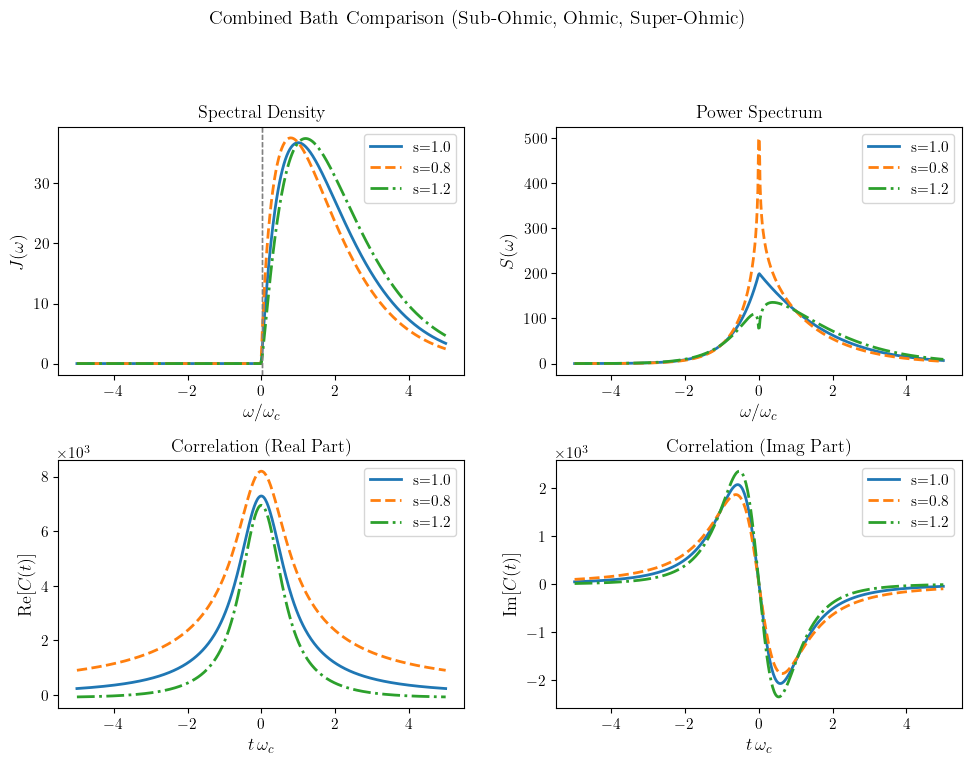

In [4]:
# COMBINED COMPARISON PLOTS (DIFFERENT S VALUES: SUB-OHMIC, OHMIC, SUPER-OHMIC)
datasets_sub_ohmic_super = [
    (f"s={s_ohm}", J_vals_ohmic, P_vals_ohmic, corr_ohmic),
    (f"s={s_sub_ohm}", J_vals_sub, P_vals_sub, corr_sub),
    (f"s={s_super_ohm}", J_vals_super, P_vals_super, corr_super),
]

freq_axis = omega / cutoff
time_axis = times * cutoff

fig, axes = four_panel_comparison(
    freq_axis,
    time_axis,
    datasets_sub_ohmic_super,
    "Combined Bath Comparison (Sub-Ohmic, Ohmic, Super-Ohmic)\n",
    filename=custom_dir / f"bath_comparison_sub_ohmic_super_{alpha:.3f}_{cutoff:.2f}_{temp:.3f}",
    marker_positions=[1 / cutoff, 2 / cutoff],
)

plt.show()


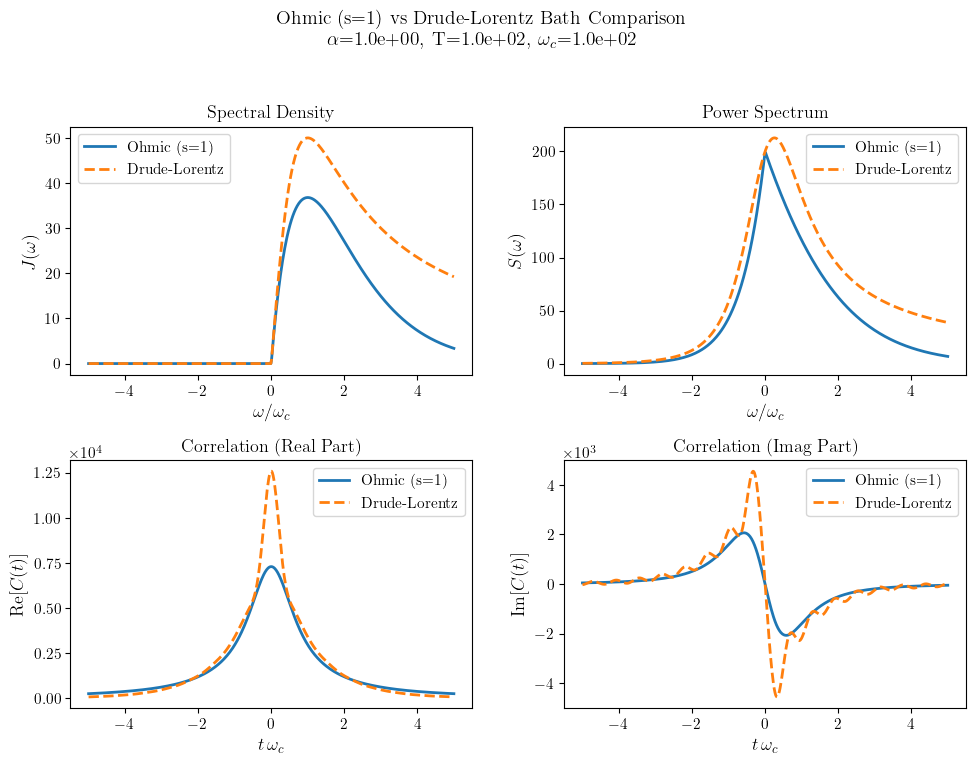

In [5]:
# COMPARISON BETWEEN OHMIC (s=1) AND DRUDE-LORENTZ BATHS
comparison_datasets = [
    ("Ohmic (s=1)", J_vals_ohmic, P_vals_ohmic, corr_ohmic),
    ("Drude-Lorentz", J_vals_dl, P_vals_dl, corr_dl),
]

title = (
    "Ohmic (s=1) vs Drude-Lorentz Bath Comparison\n"
    f"$\\alpha$={alpha:.1e}, T={temp:.1e}, $\\omega_c$={cutoff:.1e}"
)

fig, axes = four_panel_comparison(
    omega / cutoff,
    times * cutoff,
    comparison_datasets,
    title,
    filename=custom_dir / f"ohmic_vs_drude_lorentz_{alpha:.3f}_{cutoff:.2f}_{temp:.3f}",
)

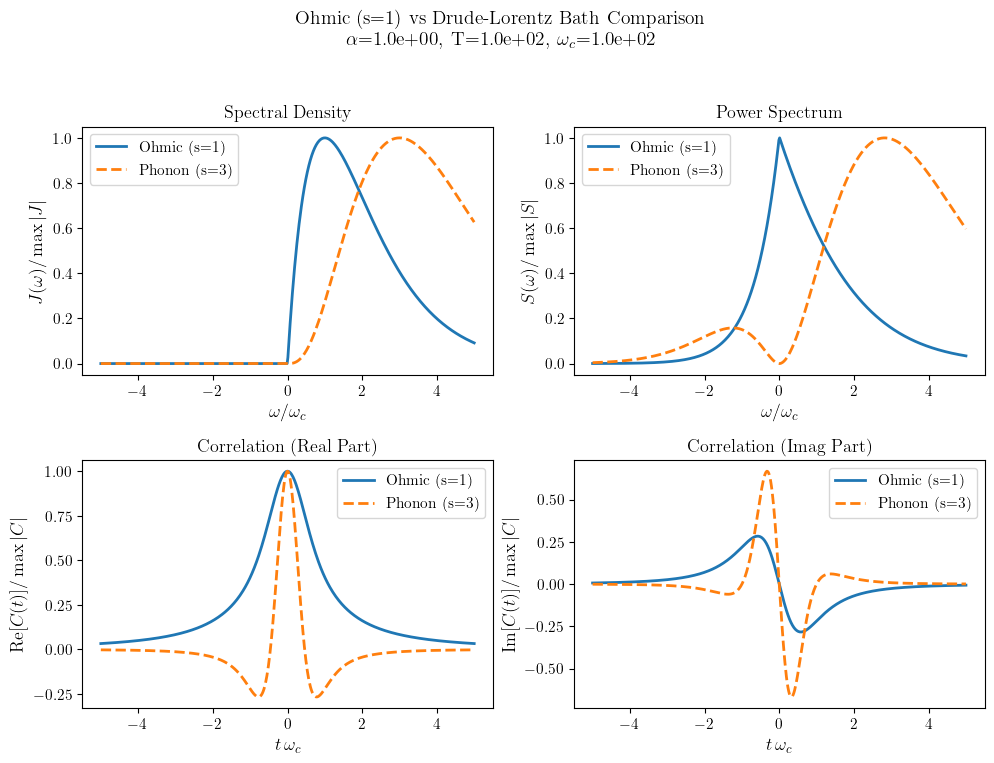

In [6]:
# TEST Super-Ohmic High-frequency phonons, electromagnetic vacuum (e.g. 3D dipole coupling →  𝑠=3). CHATGPT: "Fast-decaying correlations, weaker dephasing at low T."
from matplotlib.pylab import norm


s_phonon = 3
phonon_env = OhmicEnvironment(
    T=temp,
    wc=cutoff,
    s=s_phonon,
    alpha=alpha,
 )

J_func_phonon = phonon_env.spectral_density
P_func_phonon = phonon_env.power_spectrum
corr_func_phonon = phonon_env.correlation_function

# Add these lines after defining the phonon environment
J_vals_phonon = J_func_phonon(omega)
P_vals_phonon = P_func_phonon(omega)
corr_phonon = corr_func_phonon(times)

comparison_datasets = [
    ("Ohmic (s=1)", J_vals_ohmic, P_vals_ohmic, corr_ohmic),
    ("Phonon (s=3)", J_vals_phonon, P_vals_phonon, corr_phonon),
]

fig, axes = four_panel_comparison(
    omega / cutoff,
    times * cutoff,
    comparison_datasets,
    title,
    filename=custom_dir / f"ohmic_vs_drude_lorentz_{alpha:.3f}_{cutoff:.2f}_{temp:.3f}",
    normalize=True
)


## Temperature Effects Analysis

Explore how temperature affects the bath properties, particularly the Power spectrum and correlation functions:

🌡️ Analyzing temperature effects...


/home/leopold/miniconda3/envs/m_env/lib/python3.11/site-packages/qutip/utilities.py:55: RuntimeWarning: overflow encountered in exp
  result[non_zero] = 1 / (np.exp(w[non_zero] / w_th) - 1)


[PosixPath('test_baths/temperature_analysis_ohmic_bath.svg')]

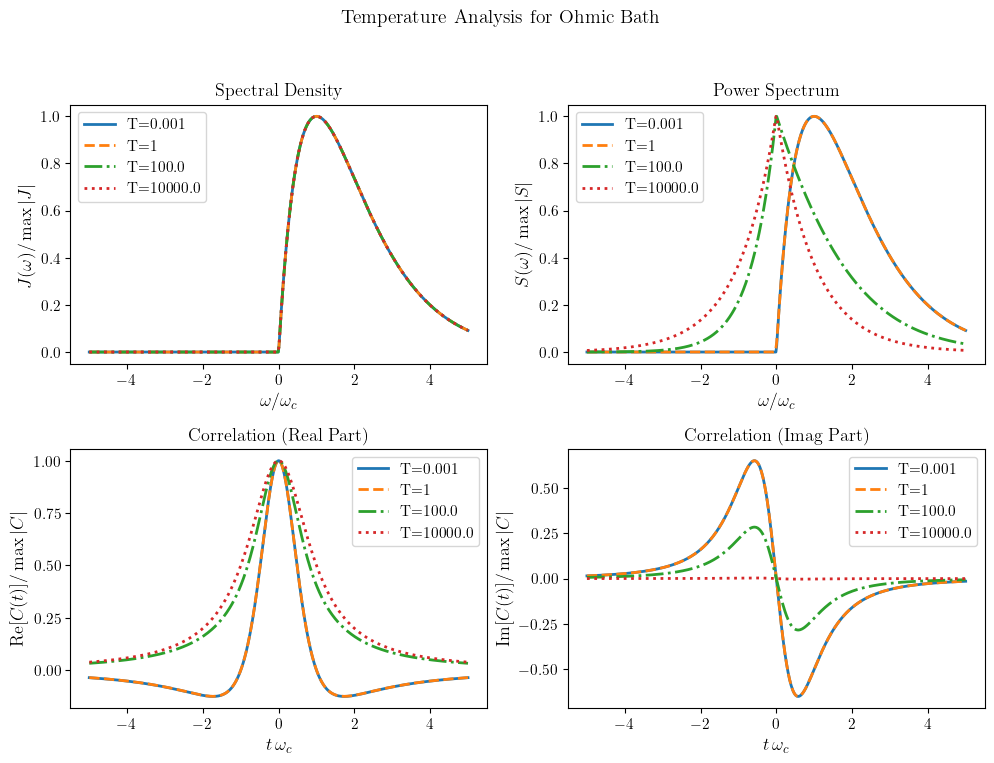

In [7]:
# TEMPERATURE EFFECTS ANALYSIS (UPDATED FOR NEW API)
# Create temperature analysis
print("🌡️ Analyzing temperature effects...")
temperatures = [1e-3, 1, 1e2, 1e4]
baths_ohmic = [OhmicEnvironment(T=temp, wc=cutoff, s=s_ohm, alpha=alpha) for temp in temperatures]
labels_ohmic = [f"T={temp}" for temp in temperatures]
fig_temp, axes_temp = analyze_temperature_effects(omega / cutoff, times * cutoff, baths_ohmic, labels_ohmic, "Temperature Analysis for Ohmic Bath", custom_dir / "temperature_analysis_ohmic_bath")
save_fig(fig_temp, custom_dir / "temperature_analysis_ohmic_bath")

🌡️ Analyzing temperature effects for super-ohmic Bath...


/home/leopold/miniconda3/envs/m_env/lib/python3.11/site-packages/qutip/utilities.py:55: RuntimeWarning: overflow encountered in exp
  result[non_zero] = 1 / (np.exp(w[non_zero] / w_th) - 1)


[PosixPath('test_baths/temperature_analysis_super_ohmic_bath.svg')]

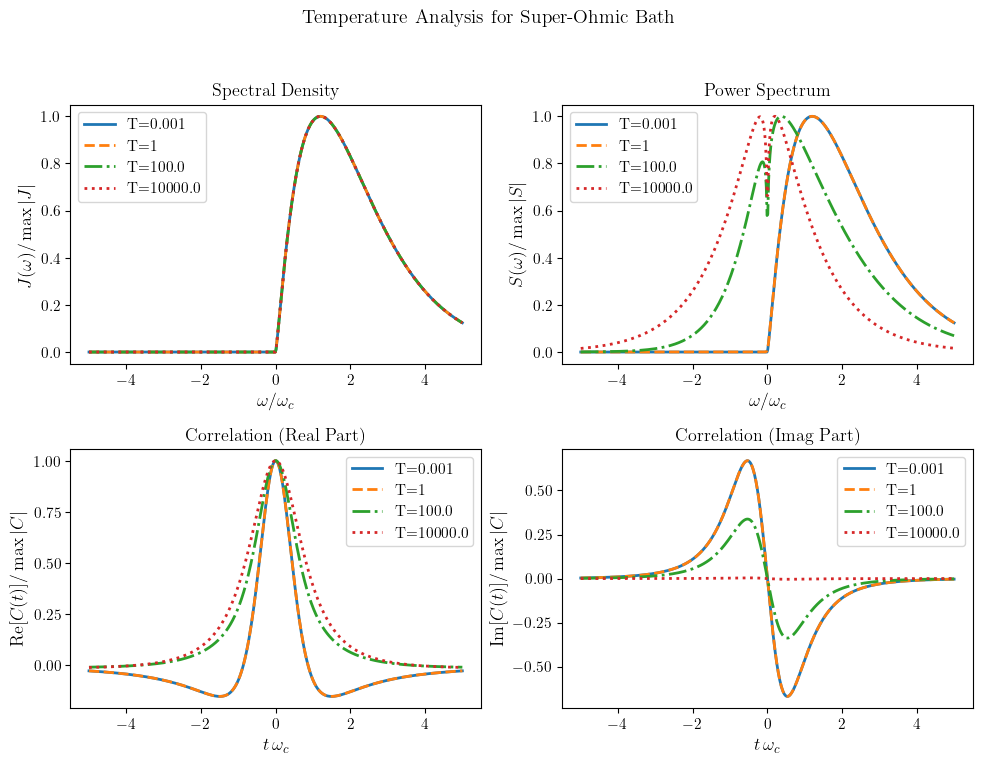

In [8]:
# Create temperature analysis for super-ohmic Bath
print("🌡️ Analyzing temperature effects for super-ohmic Bath...")
temperatures_super_ohm = [1e-3, 1, 1e2, 1e4]
baths_super_ohm = [OhmicEnvironment(T=temp, wc=cutoff, s=s_super_ohm, alpha=alpha) for temp in temperatures_super_ohm]
labels_super_ohm = [f"T={temp}" for temp in temperatures_super_ohm]
fig_temp_super_ohm, axes_temp_super_ohm = analyze_temperature_effects(omega / cutoff, times * cutoff, baths_super_ohm, labels_super_ohm, f"Temperature Analysis for Super-Ohmic Bath", custom_dir / "temperature_analysis_super_ohmic_bath")
save_fig(fig_temp_super_ohm, custom_dir / "temperature_analysis_super_ohmic_bath")

🌡️ Analyzing temperature effects for Phonon Bath...


/home/leopold/miniconda3/envs/m_env/lib/python3.11/site-packages/qutip/utilities.py:55: RuntimeWarning: overflow encountered in exp
  result[non_zero] = 1 / (np.exp(w[non_zero] / w_th) - 1)


[PosixPath('test_baths/temperature_analysis_phonon_bath.svg')]

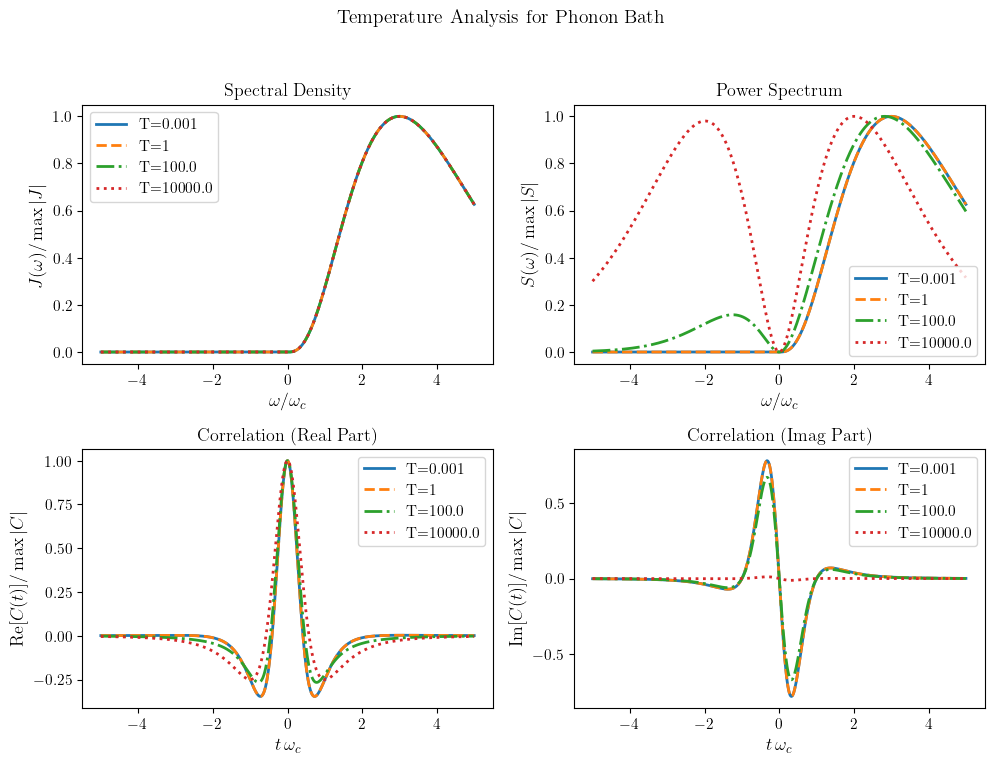

In [9]:
# Create temperature analysis for Phonon Bath
print("🌡️ Analyzing temperature effects for Phonon Bath...")
temperatures_phonon = [1e-3, 1, 1e2, 1e4]
baths_phonon = [OhmicEnvironment(T=temp, wc=cutoff, s=s_phonon, alpha=alpha) for temp in temperatures_phonon]
labels_phonon = [f"T={temp}" for temp in temperatures_phonon]
fig_temp_phonon, axes_temp_phonon = analyze_temperature_effects(omega / cutoff, times * cutoff, baths_phonon, labels_phonon, "Temperature Analysis for Phonon Bath", custom_dir / "temperature_analysis_phonon_bath")
save_fig(fig_temp_phonon, custom_dir / "temperature_analysis_phonon_bath")

🌡️ Analyzing temperature effects for Drude-Lorentz Bath...


/home/leopold/miniconda3/envs/m_env/lib/python3.11/site-packages/qutip/utilities.py:55: RuntimeWarning: overflow encountered in exp
  result[non_zero] = 1 / (np.exp(w[non_zero] / w_th) - 1)


[PosixPath('test_baths/temperature_analysis_drude_lorentz_bath.svg')]

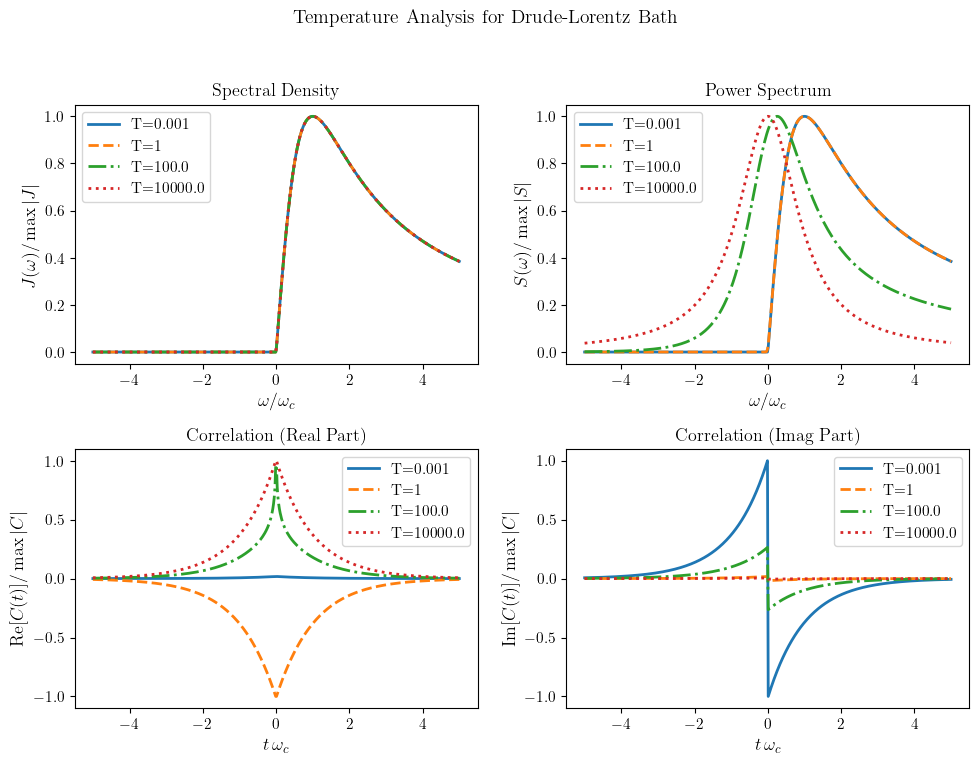

In [10]:
# Create temperature analysis for Drude-Lorentz Bath
print("🌡️ Analyzing temperature effects for Drude-Lorentz Bath...")
temperatures_dl = [1e-3, 1, 1e2, 1e4]
baths_dl = [DrudeLorentzEnvironment(T=temp, lam=alpha, gamma=cutoff) for temp in temperatures_dl]
labels_dl = [f"T={temp}" for temp in temperatures_dl]
fig_temp_dl, axes_temp_dl = analyze_temperature_effects(omega / cutoff, times * cutoff, baths_dl, labels_dl, "Temperature Analysis for Drude-Lorentz Bath", custom_dir / "temperature_analysis_drude_lorentz_bath")
save_fig(fig_temp_dl, custom_dir / "temperature_analysis_drude_lorentz_bath")

Prony approximations completed for all pairs


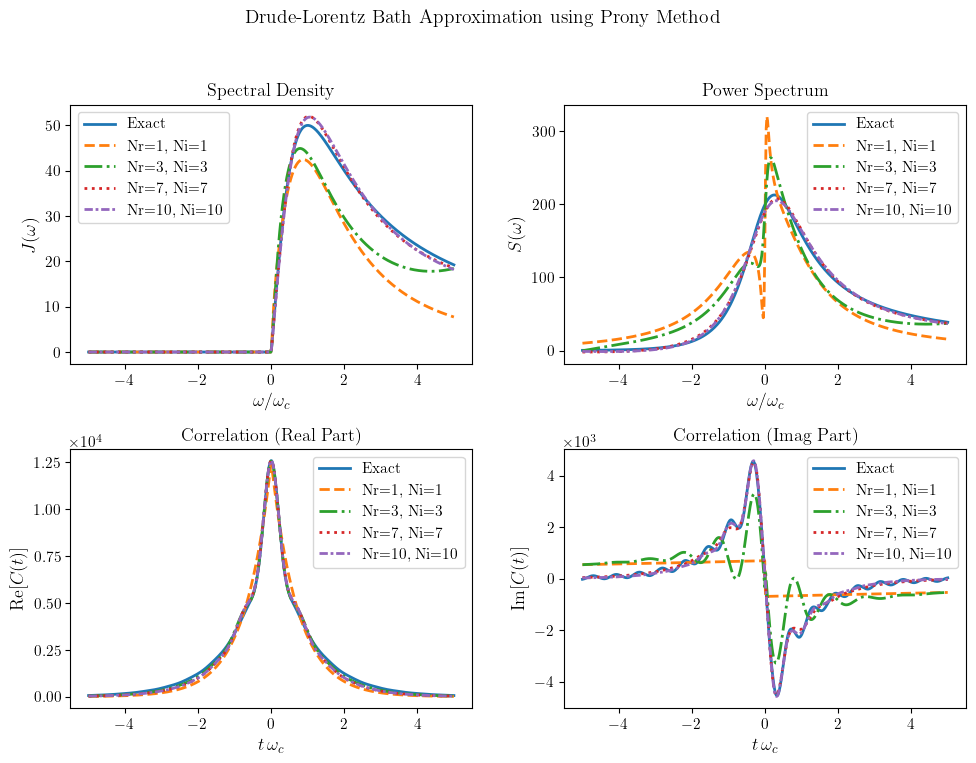

RMSE for Nr=1, Ni=1: Spectral Density: 7.64e+00, Power Spectrum: 3.32e+01, Correlation: 1.19e+03
RMSE for Nr=3, Ni=3: Spectral Density: 5.11e+00, Power Spectrum: 2.14e+01, Correlation: 7.96e+02
RMSE for Nr=7, Ni=7: Spectral Density: 7.73e-01, Power Spectrum: 3.77e+00, Correlation: 1.87e+02
RMSE for Nr=10, Ni=10: Spectral Density: 8.40e-01, Power Spectrum: 3.72e+00, Correlation: 1.73e+02


In [11]:
# APPROXIMATE DRUDE-LORENTZ BATH USING PRONY METHOD WITH DIFFERENT Nr AND Ni VALUES
# Approximate using prony method with different Nr and Ni for comparison
pairs = [(1, 1), (3, 3), (7, 7), (10, 10)]
approx_envs = []
fit_infos = []

for Nr, Ni in pairs:
    approx_env, fit_info = dl_env.approximate(
        method="prony",
        tlist=np.linspace(0, 10 / cutoff, 1000),  # Time list for correlation function
        Nr=Nr,  # Number of real poles
        Ni=Ni,  # Number of imaginary poles
        separate=True,  # Need separate=True to specify both Nr and Ni
        combine=True,
        tag=f"Drude-Lorentz Prony approximation Nr={Nr}, Ni={Ni}",
    )
    approx_envs.append(approx_env)
    fit_infos.append(fit_info)

print("Prony approximations completed for all pairs")

# Compare spectral densities, power spectra, and correlation functions
J_approx_list = [env.spectral_density(omega) for env in approx_envs]
P_approx_list = [env.power_spectrum(omega) for env in approx_envs]
corr_approx_list = [env.correlation_function(times) for env in approx_envs]

# Exact values
J_exact = dl_env.spectral_density(omega)
P_exact = dl_env.power_spectrum(omega)
corr_exact = dl_env.correlation_function(times)

datasets_prony = [("Exact", J_exact, P_exact, corr_exact)]
for idx, (Nr, Ni) in enumerate(pairs):
    datasets_prony.append(
        (f"Nr={Nr}, Ni={Ni}", J_approx_list[idx], P_approx_list[idx], corr_approx_list[idx])
    )

fig_prony, axes_prony = four_panel_comparison(
    omega / cutoff,
    times * cutoff,
    datasets_prony,
    "Drude-Lorentz Bath Approximation using Prony Method",
    filename=custom_dir / "drude_lorentz_prony_comparison",
)

plt.show()

# Print approximation quality for each pair
for i, (Nr, Ni) in enumerate(pairs):
    rmse_J = np.sqrt(np.mean((J_approx_list[i] - J_exact) ** 2))
    rmse_P = np.sqrt(np.mean((P_approx_list[i] - P_exact) ** 2))
    rmse_corr = np.sqrt(np.mean(np.abs(corr_approx_list[i] - corr_exact) ** 2))
    print(
        f"RMSE for Nr={Nr}, Ni={Ni}: Spectral Density: {rmse_J:.2e}, Power Spectrum: {rmse_P:.2e}, Correlation: {rmse_corr:.2e}"
    )

✅ Built Under-damped BO BosonicEnvironment (wMax=2000.00)
✅ Built Two Under-damped BO BosonicEnvironment (wMax=2000.00)


/home/leopold/miniconda3/envs/m_env/lib/python3.11/site-packages/qutip/utilities.py:55: RuntimeWarning: overflow encountered in exp
  result[non_zero] = 1 / (np.exp(w[non_zero] / w_th) - 1)


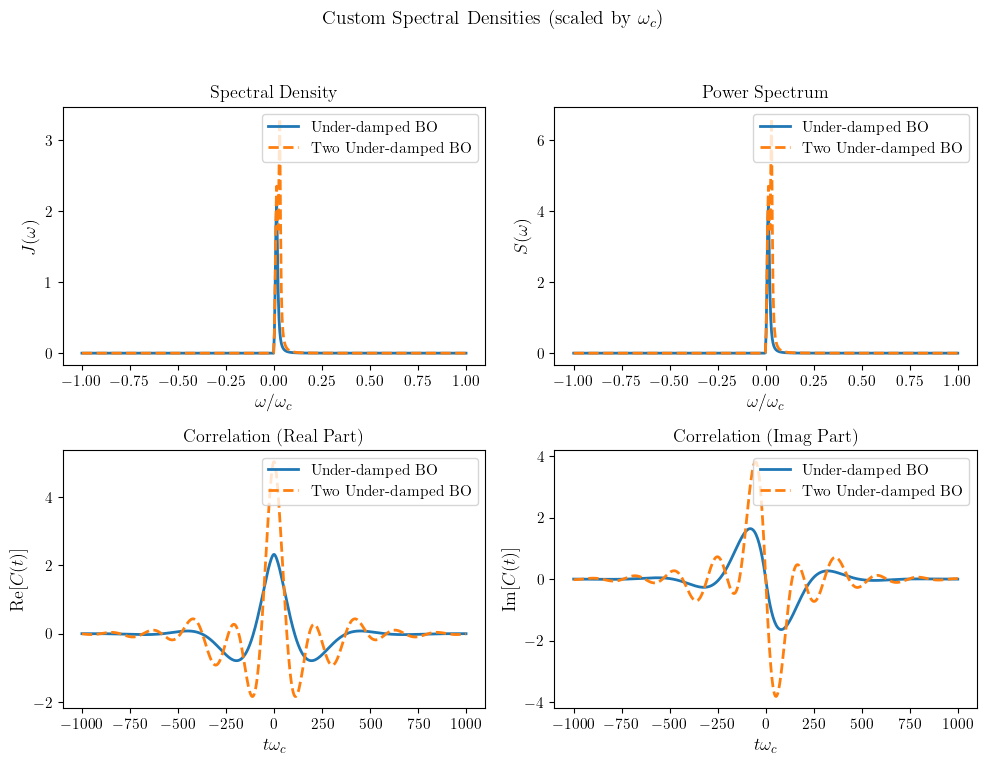

In [ ]:
# CUSTOM BOSONIC ENVIRONMENTS FROM USER-DEFINED SPECTRAL DENSITIES
# Frequency range for each bath
omega_bo = np.linspace(-1 * cutoff, 1 * cutoff, 500)
# Time axes for correlation functions
times_bo = np.linspace(-1000 / cutoff, 1000 / cutoff, 500)
lambda1 = 1.0
omega01 = 3.0
gamma1 = 3.0
lambda2 = 0.5
omega02 = 6.0
gamma2 = 2.0

def J_ubo(w, lambda_, omega0, gamma):
    w = np.asarray(w)
    wp = np.clip(w, 0, None)
    numerator = 2 * lambda_ * gamma * wp * omega0**2
    denominator = (wp**2 - omega0**2) ** 2 + (gamma * wp) ** 2
    return numerator / denominator

def J_single_ubo(w):
    return J_ubo(w, lambda_=lambda1, omega0=omega01, gamma=gamma1)
def J_two_ubo(w):
    return J_ubo(w, lambda_=lambda1, omega0=omega01, gamma=gamma1) + J_ubo(w, lambda_=lambda2, omega0=omega02, gamma=gamma2)

custom_sd_funcs = {
    "Under-damped BO": lambda w: J_ubo(w, lambda_=lambda1, omega0=omega01, gamma=gamma1),
    "Two Under-damped BO": J_two_ubo,
}

custom_datasets = []
failures = []
wmax_candidate = float(max(np.abs(omega_bo).max(), 10 * cutoff))

for label, sd_func in custom_sd_funcs.items():
    try:
        custom_env = BosonicEnvironment.from_spectral_density(
            sd_func,
            wMax=wmax_candidate,
            T=temp,
        )
    except Exception as err:
        failures.append((label, err))
        print(f"⚠️ Failed to build {label} environment: {err}")
        continue

    print(f"✅ Built {label} BosonicEnvironment (wMax={wmax_candidate:.2f})")
    spectral_vals = custom_env.spectral_density(omega_bo)
    power_vals = custom_env.power_spectrum(omega_bo)
    corr_vals = custom_env.correlation_function(times_bo)
    custom_datasets.append((label, spectral_vals, power_vals, corr_vals))

if custom_datasets:
    fig_custom, axes_custom = four_panel_comparison(
        omega_bo / cutoff,
        times_bo * cutoff,
        custom_datasets,
        "Custom Spectral Densities (scaled by $\\omega_c$)",
        filename=custom_dir / "custom_sd_lorentz_ubo",
    )
    for ax in axes_custom[0]:
        ax.set_xlabel(r"$\omega / \omega_c$")
    for ax in axes_custom[1]:
        ax.set_xlabel(r"$t \omega_c$")
    plt.show()
else:
    print("❌ No custom environments available for plotting.")

RMSE for Under-damped BO Nr=1, Ni=1: J=1.32e-01, S=1.48e+01, C=1.87e+01
RMSE for Under-damped BO Nr=3, Ni=3: J=4.65e-08, S=4.26e-06, C=5.37e-06
RMSE for Under-damped BO Nr=5, Ni=5: J=2.95e-08, S=2.86e-06, C=3.61e-06


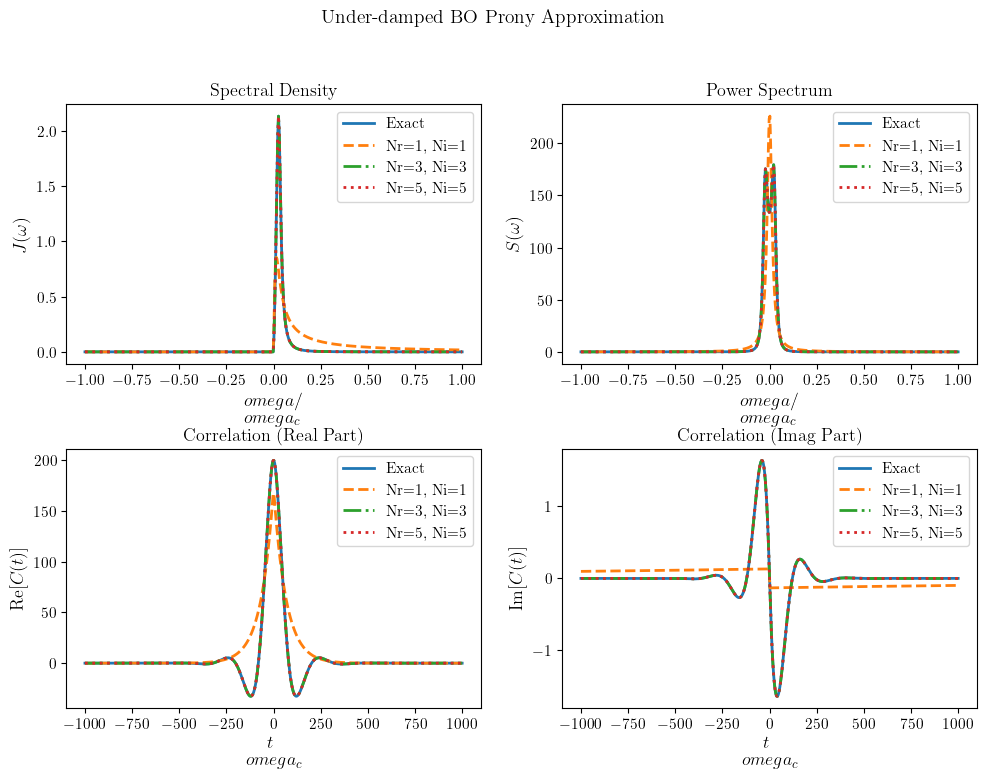

RMSE for Two Under-damped BO Nr=1, Ni=1: J=2.40e-01, S=1.53e+01, C=1.94e+01
RMSE for Two Under-damped BO Nr=3, Ni=3: J=1.26e-01, S=1.08e+01, C=1.36e+01
RMSE for Two Under-damped BO Nr=5, Ni=5: J=2.16e-05, S=1.78e-03, C=2.24e-03


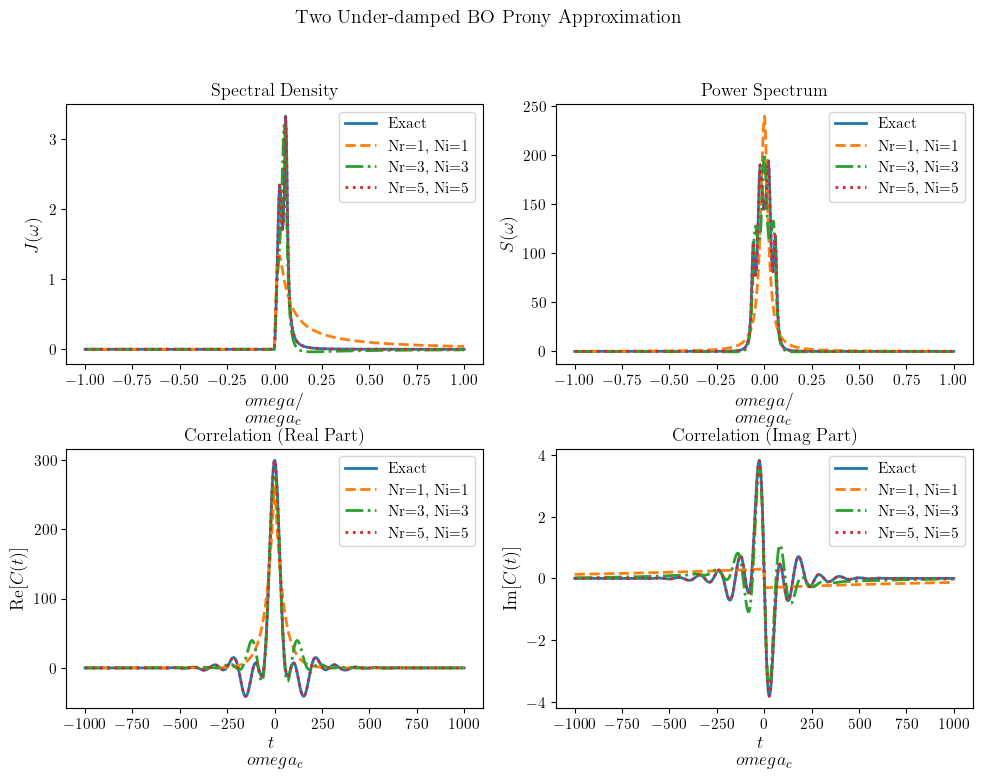

In [13]:
# APPROXIMATE CUSTOM BATHS USING PRONY METHOD
prony_pairs_custom = [(1, 1), (3, 3), (5, 5)]
custom_prony_results = {}
custom_prony_infos = {}

for label, sd_func in custom_sd_funcs.items():
    try:
        target_env = BosonicEnvironment.from_spectral_density(
            sd_func,
            wMax=wmax_candidate,
            T=temp,
        )
    except Exception as err:
        print(f"⚠️ Skipping {label} for prony approximation: {err}")
        continue

    datasets = [("Exact", target_env.spectral_density(omega_bo), target_env.power_spectrum(omega_bo), target_env.correlation_function(times_bo))]
    custom_prony_results[label] = []
    custom_prony_infos[label] = []
    for Nr, Ni in prony_pairs_custom:
        try:
            approx_env, fit_info = target_env.approximate(
                method="prony",
                tlist=np.linspace(0, times_bo.max(), 1500),
                separate=True,
                Nr=Nr,
                Ni=Ni,
                combine=True,
                tag=f"{label} Prony approximation Nr={Nr}, Ni={Ni}",
            )
        except Exception as err:
            print(f"⚠️ Prony approximation failed for {label} (Nr={Nr}, Ni={Ni}): {err}")
            continue

        custom_prony_results[label].append((approx_env, fit_info))
        custom_prony_infos[label].append(fit_info)
        datasets.append(
            (
                f"Nr={Nr}, Ni={Ni}",
                approx_env.spectral_density(omega_bo),
                approx_env.power_spectrum(omega_bo),
                approx_env.correlation_function(times_bo),
            )
        )

        rmse_J = np.sqrt(np.mean((datasets[-1][1] - datasets[0][1]) ** 2))
        rmse_P = np.sqrt(np.mean((datasets[-1][2] - datasets[0][2]) ** 2))
        rmse_corr = np.sqrt(np.mean(np.abs(datasets[-1][3] - datasets[0][3]) ** 2))
        print(
            f"RMSE for {label} Nr={Nr}, Ni={Ni}: J={rmse_J:.2e}, S={rmse_P:.2e}, C={rmse_corr:.2e}",
        )

    if len(datasets) == 1:
        print(f"❌ No successful Prony approximations for {label}.")
        continue

    label_slug = label.lower().replace(" ", "_")
    fig_label = f"{label} Prony Approximation"
    fig_custom_prony, axes_custom_prony = four_panel_comparison(
        omega_bo / cutoff,
        times_bo * cutoff,
        datasets,
        fig_label,
        filename=custom_dir / f"custom_{label_slug}_prony_comparison",
    )
    for ax in axes_custom_prony[0]:
        ax.set_xlabel(r"$\\omega / \\omega_c$")
    for ax in axes_custom_prony[1]:
        ax.set_xlabel(r"$t \\omega_c$")
    plt.show()

SD approximations completed for all Nmax values


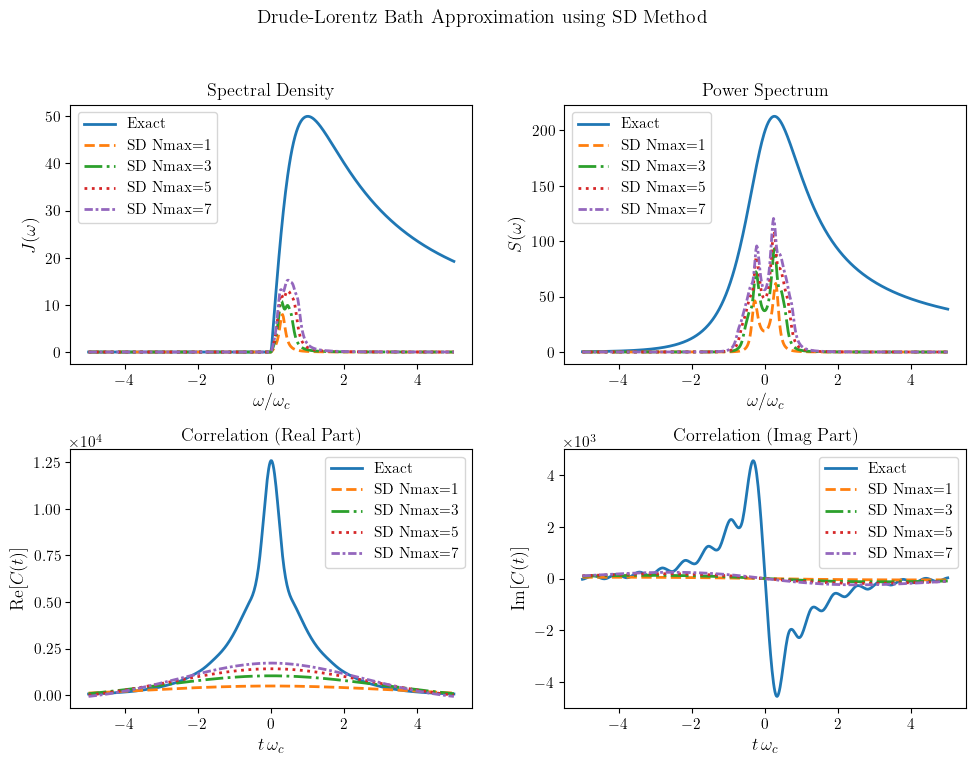

RMSE for SD Nmax=1: Spectral Density: 2.41e+01, Power Spectrum: 8.50e+01, Correlation: 3.46e+03
  Fit info (sample): {'N': 1, 'Nk': 1, 'fit_time': 0.01141810417175293}
RMSE for SD Nmax=3: Spectral Density: 2.37e+01, Power Spectrum: 7.89e+01, Correlation: 3.21e+03
  Fit info (sample): {'N': 3, 'Nk': 3, 'fit_time': 0.029657363891601562}
RMSE for SD Nmax=5: Spectral Density: 2.33e+01, Power Spectrum: 7.49e+01, Correlation: 3.06e+03
  Fit info (sample): {'N': 5, 'Nk': 5, 'fit_time': 0.09249687194824219}
RMSE for SD Nmax=7: Spectral Density: 2.30e+01, Power Spectrum: 7.18e+01, Correlation: 2.94e+03
  Fit info (sample): {'N': 7, 'Nk': 7, 'fit_time': 0.22937560081481934}


In [14]:
# APPROXIMATE DRUDE-LORENTZ BATH USING SPECTRAL-DENSITY (SD) METHOD TODO THIS IS VERY PO OR
n_exp_values = [1, 3, 5, 7]
wlist_sd = np.linspace(0, 8 * cutoff, 1000)
approx_sd_envs = []
approx_sd_infos = []

for n_exp in n_exp_values:
    env_sd, info_sd = dl_env.approximate(
        method="sd",
        wlist=wlist_sd,
        Nk=n_exp,
        target_rmse=5e-6,
        Nmax=n_exp,
        combine=True,
        tag=f"Drude-Lorentz SD approximation Nmax={n_exp}",
    )
    approx_sd_envs.append(env_sd)
    approx_sd_infos.append(info_sd)

print("SD approximations completed for all Nmax values")

J_sd_list = [env.spectral_density(omega) for env in approx_sd_envs]
P_sd_list = [env.power_spectrum(omega) for env in approx_sd_envs]
corr_sd_list = [env.correlation_function(times) for env in approx_sd_envs]

datasets_sd = [("Exact", J_vals_dl, P_vals_dl, corr_dl)]
for idx, n_exp in enumerate(n_exp_values):
    datasets_sd.append((f"SD Nmax={n_exp}", J_sd_list[idx], P_sd_list[idx], corr_sd_list[idx]))

fig_sd, axes_sd = four_panel_comparison(
    omega / cutoff,
    times * cutoff,
    datasets_sd,
    "Drude-Lorentz Bath Approximation using SD Method",
    filename=custom_dir / "drude_lorentz_sd_comparison",
)

plt.show()

for idx, n_exp in enumerate(n_exp_values):
    rmse_J = np.sqrt(np.mean((J_sd_list[idx] - J_vals_dl) ** 2))
    rmse_P = np.sqrt(np.mean((P_sd_list[idx] - P_vals_dl) ** 2))
    rmse_corr = np.sqrt(np.mean(np.abs(corr_sd_list[idx] - corr_dl) ** 2))
    print(
        f"RMSE for SD Nmax={n_exp}: Spectral Density: {rmse_J:.2e}, Power Spectrum: {rmse_P:.2e}, Correlation: {rmse_corr:.2e}"
    )
    info = approx_sd_infos[idx]
    if isinstance(info, dict) and info:
        limited_info = {k: info[k] for k in list(info)[:3]}
        print(f"  Fit info (sample): {limited_info}")

### Physical Interpretation:
- **Weak coupling regime**: $α ≪ 1$ ensures validity of Born-Markov approximation
- **High temperature**: Classical limit where $S(ω) ≈ S(-ω)$
- **Low temperature**: Quantum regime with strong frequency asymmetry

## Compare the redfield to the lindblad solver in QuTiP

In [15]:
### THIS VERSION WORKS ONLY FOR OHMIC BATHS
def ohmic_alpha_to_rate(
    alpha: float, env: OhmicEnvironment, w0: float = None, mode: str = "decay"
) -> tuple[float, float] | float:
    """
    Wrapper to convert bath coupling constant alpha to lindblad rates.
    Args:
        alpha: Coupling constant of the bath.
        env: OhmicEnvironment instance with the bath parameters.
        w0: System frequency (required for decay mode).
        mode: 'decay' for decay rates, 'deph' for dephasing rate.
    Returns:
        Decay rates (gamma_emission, gamma_absorption) or dephasing rate (gamma_deph).
    """
    if mode == "decay":
        if w0 is None:
            raise ValueError("System frequency w0 must be provided for decay mode.")
        return ohmic_alpha_to_decay_rates(alpha, env, w0)
    elif mode == "deph":
        return ohmic_alpha_to_dephasing_rate(alpha, env)
    else:
        raise ValueError("Invalid mode. Use 'decay' or 'deph'.")


def ohmic_rate_to_alpha(
    rate: float | tuple[float, float],
    env: OhmicEnvironment,
    w0: float = None,
    wc=None,
    mode: str = "decay",
) -> float:
    """
    Wrapper to convert lindblad rates to bath coupling constant alpha.
    Args:
        rate: Decay rates (gamma_emission, gamma_absorption) or dephasing rate (gamma_deph).
        env: OhmicEnvironment instance with the bath parameters.
        w0: System frequency (required for decay mode).
        mode: 'decay' for decay rates, 'deph' for dephasing rate.
    Returns:
        alpha: Coupling constant of the bath.
    """
    if wc is None:
        wc = w0
    if mode == "decay":
        return ohmic_decay_rate_to_alpha(rate, env, w0, wc)
    elif mode == "deph":
        if not isinstance(rate, float):
            raise ValueError("Rate must be a float (gamma_deph) for dephasing mode.")
        return ohmic_dephasing_rate_to_alpha(rate, env, wc)
    else:
        raise ValueError("Invalid mode. Use 'decay' or 'deph'.")


def ohmic_alpha_to_decay_rates(
    alpha: float, env: OhmicEnvironment, w0: float
) -> tuple[float, float]:
    """
    Convert bath coupling constant alpha to lindblad decay channel rates.
    Args:
        alpha: Coupling constant of the bath.
        env: OhmicEnvironment instance with the bath parameters.
        w0: System frequency.
    Returns:
        gamma_emission: Spontaneous emission rate.
        gamma_absorption: Thermal absorption rate.
    """
    env.alpha = alpha
    P_plus = env.power_spectrum(w0)  # S(+ω) - emission rate
    P_minus = env.power_spectrum(-w0)  # S(-ω) - absorption rate
    return P_plus, P_minus


def ohmic_decay_rate_to_alpha(
    gamma_emission: float, env: OhmicEnvironment, w0: float, wc: float
) -> float:
    """
    Convert lindblad decay channel rates to bath coupling constant alpha.
    Args:
        gamma_emission: Spontaneous emission rate.
        gamma_absorption: Thermal absorption rate.
        env: OhmicEnvironment instance with the bath parameters.
        w0: System frequency.
    Returns:
        alpha: Coupling constant of the bath.
    """
    # Avoid division by zero if w0 is very small
    if w0 < 1e-12:
        raise ValueError("w0 is too small; cannot determine alpha reliably.")

    temp = env.T

    P_plus = gamma_emission
    # Invert power spectrum to find alpha
    from qspectro2d.config import BOLTZMANN, HBAR

    w_th = BOLTZMANN * temp / HBAR
    coth_term = 1 / np.tanh(w0 / (2 * w_th))
    alpha = P_plus / (w0 * np.exp(-w0 / wc) * (coth_term + 1))

    return alpha


def ohmic_alpha_to_dephasing_rate(alpha: float, env: OhmicEnvironment) -> float:
    """
    Convert bath coupling constant alpha to lindblad dephasing rate.
    Args:
        alpha: Coupling constant of the bath.
        env: OhmicEnvironment instance with the bath parameters.
    Returns:
        gamma_deph: Pure dephasing rate.
    """
    print("now at0 freq 0 the PowerSpec is", env.power_spectrum(0))
    env.alpha = alpha
    P_zero = env.power_spectrum(0)  # S(0) - dephasing rate
    print("at freq 0 the PowerSpec is", P_zero)
    gamma_deph = P_zero
    return gamma_deph


def ohmic_dephasing_rate_to_alpha(gamma_deph: float, env: OhmicEnvironment, wc: float) -> float:
    """
    Convert lindblad dephasing rate to bath coupling constant alpha.
    Args:
        gamma_deph: Pure dephasing rate.
        env: OhmicEnvironment instance with the bath parameters.
    Returns:
        alpha: Coupling constant of the bath.
    """
    from qspectro2d.config import BOLTZMANN

    temp = env.T
    P_zero = gamma_deph
    alpha = P_zero / (2 * BOLTZMANN * temp)

    return alpha

### tls comparison between Redfield and Linblad rates

operator in canonical basis vs eigenbasis: Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.    0.001]
 [0.001 0.   ]] [[ 0.    -0.001]
 [-0.001  0.   ]]
hamilton in canonical basis vs eigenbasis: Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0. 0.]
 [0. 2.]] [[0. 0.]
 [0. 2.]]
At ω=0, P(ω)=4.01e-05


[PosixPath('test_baths/ohmic_power_spectrum.svg')]

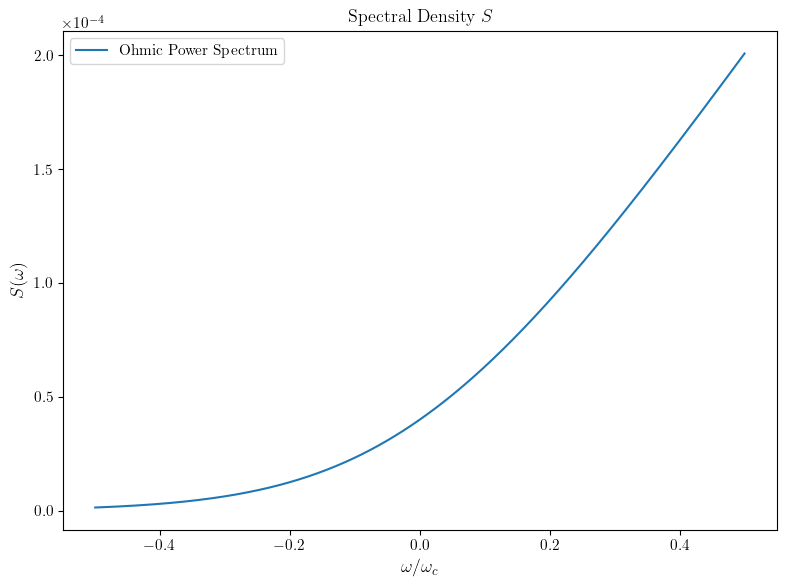

In [16]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt


# SYSTEM PARAMETERS

g = basis(2, 0)
e = basis(2, 1)  # Ground and excited states

sigma_minus = g * e.dag()  # |g⟩⟨e| - lowering operator
sigma_plus = e * g.dag()  # |e⟩⟨g| - raising operator

sigma_x = sigma_minus + sigma_plus  # σ_x operator for system-bath coupling
sigma_z = e * e.dag() - g * g.dag()  # σ_z operator for system-bath coupling

w0 = 2.0  # central transition frequency
wL = 0.99 * w0  # laser frequency
rabi = 1e-3  # drive amplitude (same on both sites)
H0 = w0 * ket2dm(e)  # Hamiltonian: H = w0 |e⟩⟨e| + rabi (|g⟩⟨e| + |e⟩⟨g|)
# Classical drive couples to dipoles (x) on both sites
basis_states = H0.eigenstates()[1]
# print("eigenvectors", basis_states)
U = Qobj(np.column_stack([e.full() for e in basis_states]), dims=H0.dims)
mu_drive = rabi * (sigma_x)
mu_new = U.dag() * mu_drive * U
H_diag = U.dag() * H0 * U
print("operator in canonical basis vs eigenbasis:", mu_drive, mu_new.tidyup().full().real)
print("hamilton in canonical basis vs eigenbasis:", H0, H_diag.tidyup().full().real)
H = [H_diag, [mu_new, lambda t: np.cos(wL * t)]]

# BATH PARAMETERS

temp = 1e-1  # Temperature in Kelvin
cutoff = 1e2 * w0  # Cutoff frequency in cm^-1
alpha = 1e-4 * w0  # Coupling strength
ohm_env = OhmicEnvironment(T=temp, wc=cutoff, s=1.0, alpha=alpha, tag="ohmic")

omega = np.linspace(-5e-1, 5e-1, 1000)  # Frequency
power_spectrum_vals = ohm_env.power_spectrum(omega)
print("At ω=0, P(ω)=%.2e" % power_spectrum_vals[500])  # Print power spectrum at ω=0

plt.figure()
plt.plot(omega, power_spectrum_vals, label="Ohmic Power Spectrum", color=COLORS[0])
plt.xlabel(r"$\omega / \omega_c$")  # Use LaTeX math formatting for Greek letters
plt.ylabel(r"$S(\omega)$")  # Example: update ylabel as well
plt.title(r"Spectral Density $S$")  # Update title
plt.legend()
save_fig(plt.gcf(), custom_dir / "ohmic_power_spectrum")

In [17]:
# SIMPLIFIED PLOTTING AND ANALYSIS
# Recalculate with consistent omega array
omega = np.linspace(-1 * cutoff, 20 * cutoff, 1000)
J_vals_paper = J_func_paper(omega)
J_vals_ohmic = J_func_ohmic(omega)
P_vals_paper = P_func_paper(omega)
P_vals_ohmic = P_func_ohmic(omega)
J_vals_dl = J_func_dl(omega)
P_vals_dl = P_func_dl(omega)

def create_comparison_plot():
    """Create comprehensive bath comparison plots"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    # Spectral densities
    axes[0, 0].plot(omega / cutoff, J_vals_paper, label="Paper", color=COLORS[0])
    axes[0, 0].plot(omega / cutoff, J_vals_ohmic, label="Ohmic", color=COLORS[1], linestyle="--")
    axes[0, 0].set_xlabel(r"$\omega / \omega_c$")
    axes[0, 0].set_ylabel(r"$J(\omega)$")
    axes[0, 0].set_title("Spectral Density Comparison")
    axes[0, 0].legend()

    # Log scale
    axes[0, 1].plot(omega / cutoff, J_vals_paper, label="Paper", color=COLORS[0])
    axes[0, 1].plot(omega / cutoff, J_vals_ohmic, label="Ohmic", color=COLORS[1], linestyle="--")
    axes[0, 1].set_xlabel(r"$\omega / \omega_c$")
    axes[0, 1].set_ylabel(r"$J(\omega)$")
    axes[0, 1].set_title("Spectral Density (Log Scale)")
    axes[0, 1].set_yscale("log")
    axes[0, 1].legend()

    # Ratio
    ratio = np.divide(
        J_vals_ohmic, J_vals_paper, out=np.zeros_like(J_vals_ohmic), where=J_vals_paper != 0
    )
    axes[1, 0].plot(omega / cutoff, ratio, color=COLORS[2])
    axes[1, 0].set_xlabel(r"$\omega / \omega_c$")
    axes[1, 0].set_ylabel(r"$J_{ohmic}(\omega) / J_{paper}(\omega)$")
    axes[1, 0].set_title("Ratio of Ohmic to Paper")

    axes[1, 1].axis("off")  # Empty subplot

    plt.tight_layout()
    plt.show()

    return fig

add a part explaining the double hilbertspace and so on

now at0 freq 0 the PowerSpec is 4e-05
at freq 0 the PowerSpec is 4e-05


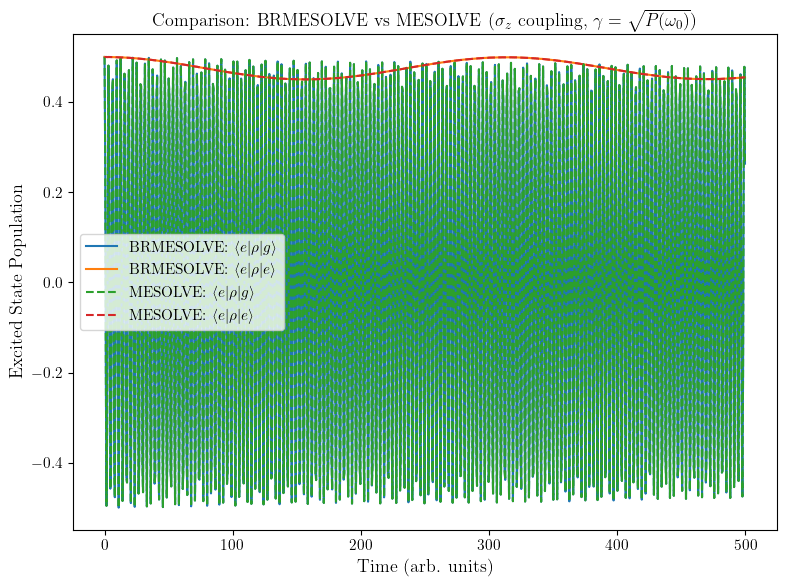

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [18]:
rho_ini = (e + g).unit()  # Initial state: excited state |e⟩⟨e|
tlist = np.linspace(0, 500, 1000)  # Time array


# BRMESOLVE SIMULATION

a_ops_brme_deph = [
    [sigma_z, lambda w: ohm_env.power_spectrum(w)]
]  # Use sigma_z as system-bath coupling

result_brme_deph = brmesolve(H, rho_ini, tlist, a_ops_brme_deph)


# MESOLVE SIMULATION

### Extract power spectrum at zero frequency for pure dephasing
gamma_deph = ohmic_alpha_to_rate(alpha, ohm_env, mode="deph")  # Pure dephasing rate

### Collapse operators for pure dephasing
c_ops_me_deph = [np.sqrt(gamma_deph) * sigma_z]  # Pure dephasing collapse operator

result_me_deph = mesolve(H, rho_ini, tlist, c_ops_me_deph)


# PLOT COMPARISON

plt.figure()

# Plot coherence and pop for brmesolve
pop_brme = [state[1, 1].real for state in result_brme_deph.states]
coh_brme = [state[0, 1].real for state in result_brme_deph.states]
plt.plot(
    tlist,
    coh_brme,
    label=r"BRMESOLVE: $\langle e|\rho|g\rangle$",
    color=COLORS[0],
    linestyle=LINE_STYLES[0],
)
plt.plot(
    tlist,
    pop_brme,
    label=r"BRMESOLVE: $\langle e|\rho|e\rangle$",
    color=COLORS[1],
    linestyle=LINE_STYLES[0],
)
# Plot coherence and pop for mesolve
pop_me = [state[1, 1].real for state in result_me_deph.states]
coh_me = [state[0, 1].real for state in result_me_deph.states]
plt.plot(
    tlist,
    coh_me,
    label=r"MESOLVE: $\langle e|\rho|g\rangle$",
    color=COLORS[2],
    linestyle=LINE_STYLES[1],
)
plt.plot(
    tlist,
    pop_me,
    label=r"MESOLVE: $\langle e|\rho|e\rangle$",
    color=COLORS[3],
    linestyle=LINE_STYLES[1],
)

plt.xlabel(r"Time (arb. units)")
plt.ylabel(r"Excited State Population")
plt.title(r"Comparison: BRMESOLVE vs MESOLVE ($\sigma_z$ coupling, $\gamma = \sqrt{P(\omega_0)}$)")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()

In [19]:
rho_ini = (e + g).unit()  # Initial state: excited state |e⟩⟨e|
tlist = np.linspace(0, 50, 500)  # Time array


# BRMESOLVE SIMULATION

a_ops_brme = a_ops_brme_decay + a_ops_brme_deph
result_brme = brmesolve(H, rho_ini, tlist, a_ops_brme)


# MESOLVE SIMULATION

c_ops_me = c_ops_me_decay + c_ops_me_deph

result_me = mesolve(H, rho_ini, tlist, c_ops_me)


# PLOT COMPARISON

plt.figure()

# Plot coherence and pop for brmesolve
pop_brme = [state[1, 1].real for state in result_brme.states]
coh_brme = [state[0, 1].real for state in result_brme.states]
plt.plot(
    tlist,
    coh_brme,
    label=r"BRMESOLVE: $\langle e|\rho|g\rangle$",
    color=COLORS[0],
    linestyle=LINE_STYLES[0],
)
plt.plot(
    tlist,
    pop_brme,
    label=r"BRMESOLVE: $\langle e|\rho|e\rangle$",
    color=COLORS[1],
    linestyle=LINE_STYLES[0],
)
# Plot coherence and pop for mesolve
pop_me = [state[1, 1].real for state in result_me.states]
coh_me = [state[0, 1].real for state in result_me.states]
plt.plot(
    tlist,
    coh_me,
    label=r"MESOLVE: $\langle e|\rho|g\rangle$",
    color=COLORS[2],
    linestyle=LINE_STYLES[1],
)
plt.plot(
    tlist,
    pop_me,
    label=r"MESOLVE: $\langle e|\rho|e\rangle$",
    color=COLORS[3],
    linestyle=LINE_STYLES[1],
)

plt.xlabel(r"Time (arb. units)")
plt.ylabel(r"Excited State Population")
plt.title(r"Comparison: BRMESOLVE vs MESOLVE ($\sigma_x$ coupling, $\gamma = \sqrt{P(\omega_0)}$)")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure()

NameError: name 'a_ops_brme_decay' is not defined

## Dimer (4-level) comparison: BRMESOLVE vs MESOLVE

We consider a dimer composed of two coupled two-level systems (sites), with:
- Local site energies $\omega_1$ and $\omega_2$
- Excitonic coupling $J$ between single-exciton states
- Classical driving by a coherent laser: $\propto \cos(\omega_L t)$ acting on both sites
- Local Ohmic baths on each site providing energy relaxation (via $\sigma_x$) and pure dephasing (via $\sigma_z$)

We compare Redfield (BRMESOLVE) and Lindblad (MESOLVE) dynamics using rates inferred from the bath power spectra.

In [ ]:

# DIMER SETUP AND COMPARISON (4-LEVEL SYSTEM)

import numpy as np
import matplotlib.pyplot as plt
from qutip import basis, qeye, tensor, ket2dm, Qobj, OhmicEnvironment, brmesolve, mesolve


# SYSTEM: TWO SITES (2 x TLS) → 4 LEVELS

g = basis(2, 0)  # |g>
e = basis(2, 1)  # |e>
I2 = qeye(2)

# Local ops for one site
sm = g * e.dag()  # lowering
sp = e * g.dag()  # raising
sx = sm + sp
sz = e * e.dag() - g * g.dag()  # Pauli-z

# Tensor-site operators
sm1 = tensor(sm, I2)
sp1 = tensor(sp, I2)
sx1 = tensor(sx, I2)
sz1 = tensor(sz, I2)

sm2 = tensor(I2, sm)
sp2 = tensor(I2, sp)
sx2 = tensor(I2, sx)
sz2 = tensor(I2, sz)

# Projectors for observables
P_gg = tensor(g * g.dag(), g * g.dag())
P_eg = tensor(e * e.dag(), g * g.dag())
P_ge = tensor(g * g.dag(), e * e.dag())
P_ee = tensor(e * e.dag(), e * e.dag())


# HAMILTONIAN PARAMETERS

delta = 0.2 * w0  # site detuning
w1 = w0 + 0.5 * delta  # site-1 transition
w2 = w0 - 0.5 * delta  # site-2 transition
J_coup = 5e-3 * w0  # excitonic coupling

# Bare H0 in site basis: local excitations + resonant exchange (single-exciton manifold)
H0 = w1 * P_eg + w2 * P_ge + J_coup * (sp1 * sm2 + sp2 * sm1) + (w1 + w2) * P_ee

# Classical drive couples to dipoles (x) on both sites
basis_states = H0.eigenstates()[1]
# print("eigenvectors", basis_states)
U = Qobj(np.column_stack([e.full() for e in basis_states]), dims=H0.dims)
mu_drive = rabi * (sx1 + sx2)
mu_new = U.dag() * mu_drive * U
H_diag = U.dag() * H0 * U
print("operator in canonical basis vs eigenbasis:", mu_drive, mu_new.tidyup().full().real)
print("hamilton in canonical basis vs eigenbasis:", H0, H_diag.tidyup().full().real)
H = [H_diag, [mu_new, lambda t: np.cos(wL * t)]]



# OBSERVABLES AND PLOTS

def pops_from_result(result):
    """Return populations and coherences for a two-site system."""
    states = result.states

    # populations
    p_gg = np.array([expect(P_gg, st) for st in states])  # both ground
    p_eg = np.array([expect(P_eg, st) for st in states])  # site 1 excited
    p_ge = np.array([expect(P_ge, st) for st in states])  # site 2 excited
    p_ee = np.array([expect(P_ee, st) for st in states])  # both excited

    # inter-site coherence |eg><ge| + |ge><eg|
    coh_op = (tensor(e * g.dag(), g * e.dag()) + tensor(g * e.dag(), e * g.dag())) / 2.0
    coh_IJ = np.array([expect(coh_op, st) for st in states])

    # coherence between ground state and single-excited states:
    # |gg><eg| + |gg><ge|  (and h.c.)
    coh_0I_op = (
        tensor(g * g.dag(), g * e.dag())
        + tensor(g * e.dag(), g * g.dag())
        + tensor(g * e.dag(), g * g.dag())
        + tensor(g * g.dag(), e * g.dag())
    ) / 2.0
    coh_0I = np.array([expect(coh_0I_op, st) for st in states])

    # coherence between ground and double excited: |gg><ee| + h.c.
    coh_0AB_op = tensor(g * g.dag(), g * g.dag()) * tensor(
        e * e.dag(), e * e.dag()
    )  # then add h.c.
    coh_0AB_op = (
        tensor(g, g) * tensor(e.dag(), e.dag()) + tensor(e, e) * tensor(g.dag(), g.dag())
    ) / 2.0
    coh_0AB = np.array([expect(coh_0AB_op, st) for st in states])

    # coherence between single and double excited manifolds:
    # |eg><ee| + |ge><ee| (and h.c.)
    coh_IAB_op = (
        tensor(e * e.dag(), g * e.dag())
        + tensor(g * e.dag(), e * e.dag())
        + tensor(e * g.dag(), e * e.dag())
        + tensor(e * e.dag(), e * g.dag())
    ) / 2.0
    coh_IAB = np.array([expect(coh_IAB_op, st) for st in states])

    return p_gg, p_eg, p_ge, p_ee, coh_IJ, coh_0I, coh_0AB, coh_IAB

operator in canonical basis vs eigenbasis: Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.    0.001 0.001 0.   ]
 [0.001 0.    0.    0.001]
 [0.001 0.    0.    0.001]
 [0.    0.001 0.001 0.   ]] [[0.         0.00097471 0.00102466 0.        ]
 [0.00097471 0.         0.         0.00097471]
 [0.00102466 0.         0.         0.00102466]
 [0.         0.00097471 0.00102466 0.        ]]
hamilton in canonical basis vs eigenbasis: Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=CSR, isherm=True
Qobj data =
[[0.   0.   0.   0.  ]
 [0.   1.8  0.01 0.  ]
 [0.   0.01 2.2  0.  ]
 [0.   0.   0.   4.  ]] [[0.         0.         0.         0.        ]
 [0.         1.79975016 0.         0.        ]
 [0.         0.         2.20024984 0.        ]
 [0.         0.         0.         4.        ]]


c:\Users\leopo\anaconda3\envs\master_env\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\leopo\anaconda3\envs\master_env\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


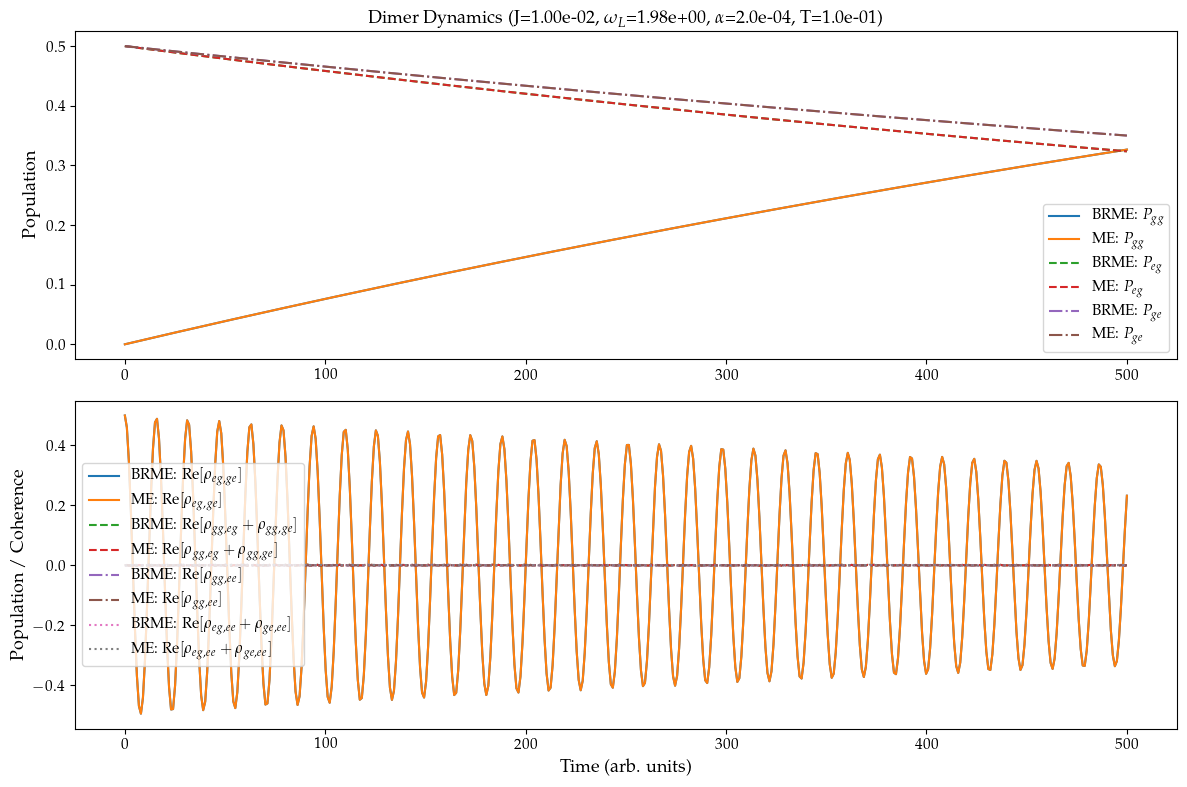

In [ ]:
rho_ini = (tensor(e, g) + tensor(g, e)).unit()  # Initial state: excited state |e⟩⟨e|
tlist = np.linspace(0, 500, 500)  # Time array


# BRMESOLVE SIMULATION

a_ops_brme_decay = [
    [sx1, lambda w: ohm_env.power_spectrum(w)],
    [sx2, lambda w: ohm_env.power_spectrum(w)],
]

result_brme_decay = brmesolve(H, rho_ini, tlist, a_ops_brme_decay)


# MESOLVE SIMULATION

### Extract power spectrum at system frequency
gamma_em_1, gamma_abs_1 = ohmic_alpha_to_rate(alpha, ohm_env, w0=w1, mode="decay")
gamma_em_2, gamma_abs_2 = ohmic_alpha_to_rate(alpha, ohm_env, w0=w2, mode="decay")

### Collapse operators
c_ops_me_decay = [
    np.sqrt(gamma_em_1) * sm1,  # Emission: |e⟩ → |g⟩
    np.sqrt(gamma_abs_1) * sp1,  # Absorption: |g⟩ → |e⟩
    np.sqrt(gamma_em_2) * sm2,  # Emission: |e⟩ → |g⟩
    np.sqrt(gamma_abs_2) * sp2,  # Absorption: |g⟩ → |e⟩
]
result_me_decay = mesolve(H, rho_ini, tlist, c_ops_me_decay)

p_gg_b, p_eg_b, p_ge_b, p_ee_b, coh_IJ_b, coh_0I_b, coh_0AB_b, coh_IAB_b = pops_from_result(
    result_brme_decay
)
p_gg_m, p_eg_m, p_ge_m, p_ee_m, coh_IJ_m, coh_0I_m, coh_0AB_m, coh_IAB_m = pops_from_result(
    result_me_decay
)

plt.figure(figsize=(12, 8))

# Populations: |eg>, |ge|
plt.subplot(2, 1, 1)
plt.plot(tlist, p_gg_b, color=COLORS[0], linestyle=LINE_STYLES[0], label=r"BRME: $P_{gg}$")
plt.plot(tlist, p_gg_m, color=COLORS[1], linestyle=LINE_STYLES[0], label=r"lindblad: $P_{gg}$")
plt.plot(tlist, p_eg_b, color=COLORS[2], linestyle=LINE_STYLES[1], label=r"BRME: $P_{eg}$")
plt.plot(tlist, p_eg_m, color=COLORS[3], linestyle=LINE_STYLES[1], label=r"lindblad: $P_{eg}$")
plt.plot(tlist, p_ge_b, color=COLORS[4], linestyle=LINE_STYLES[2], label=r"BRME: $P_{ge}$")
plt.plot(tlist, p_ge_m, color=COLORS[5], linestyle=LINE_STYLES[2], label=r"lindblad: $P_{ge}$")
plt.ylabel(r"Population")
plt.title(
    rf"Dimer Dynamics (J={J_coup:.2e}, $\omega_L$={wL:.2e}, $\alpha$={alpha:.1e}, T={temp:.1e})"
)
plt.legend()

# Double excitation and coherence
plt.subplot(2, 1, 2)
plt.plot(
    tlist,
    coh_IJ_b,
    color=COLORS[0],
    linestyle=LINE_STYLES[0],
    label=r"BRME: $\mathrm{Re}[\rho_{eg,ge}]$",
)
plt.plot(
    tlist,
    coh_IJ_m,
    color=COLORS[1],
    linestyle=LINE_STYLES[0],
    label=r"lindblad: $\mathrm{Re}[\rho_{eg,ge}]$",
)
plt.plot(
    tlist,
    coh_0I_b,
    color=COLORS[2],
    linestyle=LINE_STYLES[1],
    label=r"BRME: $\mathrm{Re}[\rho_{gg,eg}+\rho_{gg,ge}]$",
)
plt.plot(
    tlist,
    coh_0I_m,
    color=COLORS[3],
    linestyle=LINE_STYLES[1],
    label=r"lindblad: $\mathrm{Re}[\rho_{gg,eg}+\rho_{gg,ge}]$",
)
plt.plot(
    tlist,
    coh_0AB_b,
    color=COLORS[4],
    linestyle=LINE_STYLES[2],
    label=r"BRME: $\mathrm{Re}[\rho_{gg,ee}]$",
)
plt.plot(
    tlist,
    coh_0AB_m,
    color=COLORS[5],
    linestyle=LINE_STYLES[2],
    label=r"lindblad: $\mathrm{Re}[\rho_{gg,ee}]$",
)
plt.plot(
    tlist,
    coh_IAB_b,
    color=COLORS[6],
    linestyle=LINE_STYLES[3],
    label=r"BRME: $\mathrm{Re}[\rho_{eg,ee}+\rho_{ge,ee}]$",
)
plt.plot(
    tlist,
    coh_IAB_m,
    color=COLORS[7],
    linestyle=LINE_STYLES[3],
    label=r"lindblad: $\mathrm{Re}[\rho_{eg,ee}+\rho_{ge,ee}]$",
)
plt.xlabel(r"Time (arb. units)")
plt.ylabel(r"Population / Coherence")
plt.legend()

plt.tight_layout()
# save_fig(plt.gcf(), custom_dir / 'dimer_brme_vs_me')
plt.show()

now at0 freq 0 the PowerSpec is 4e-05
at freq 0 the PowerSpec is 4e-05
now at0 freq 0 the PowerSpec is 4e-05
at freq 0 the PowerSpec is 4e-05


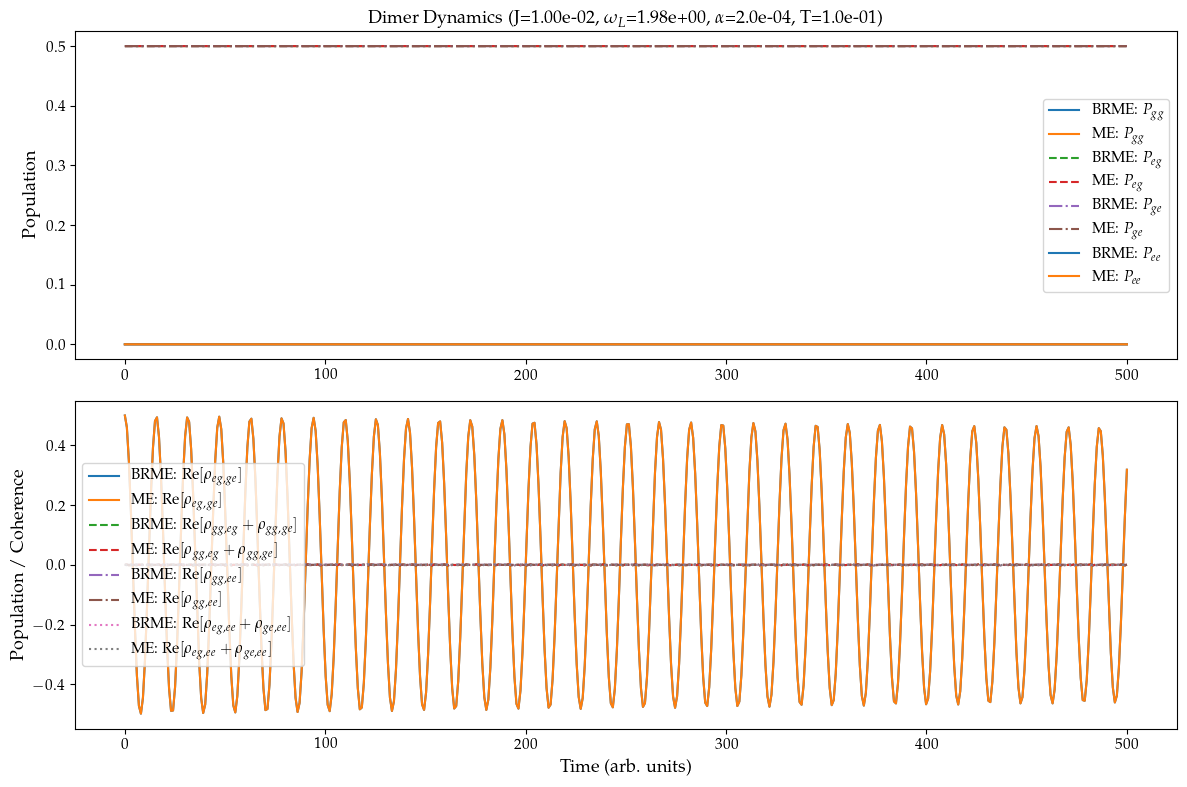

In [ ]:
rho_ini = (tensor(e, g) + tensor(g, e)).unit()  # Initial state: excited state |e⟩⟨e|
tlist = np.linspace(0, 500, 500)  # Time array


# BRMESOLVE SIMULATION

a_ops_brme_deph = [
    [sz1, lambda w: ohm_env.power_spectrum(w)],
    [sz2, lambda w: ohm_env.power_spectrum(w)],
]

result_brme_deph = brmesolve(H, rho_ini, tlist, a_ops_brme_deph)


# MESOLVE SIMULATION

### Extract power spectrum at system frequency
gamma_deph_1 = ohmic_alpha_to_rate(alpha, ohm_env, w0=w1, mode="deph")
gamma_deph_2 = ohmic_alpha_to_rate(alpha, ohm_env, w0=w2, mode="deph")

### Collapse operators
c_ops_me_deph = [
    np.sqrt(gamma_deph_1) * sz1,  # dephasing:
    np.sqrt(gamma_deph_2) * sz2,  # dephasing:
]
result_me_deph = mesolve(H, rho_ini, tlist, c_ops_me_deph)


p_gg_b, p_eg_b, p_ge_b, p_ee_b, coh_IJ_b, coh_0I_b, coh_0AB_b, coh_IAB_b = pops_from_result(
    result_brme_deph
)
p_gg_m, p_eg_m, p_ge_m, p_ee_m, coh_IJ_m, coh_0I_m, coh_0AB_m, coh_IAB_m = pops_from_result(
    result_me_deph
)

plt.figure(figsize=(12, 8))

# Populations: |eg>, |ge|
plt.subplot(2, 1, 1)
plt.plot(tlist, p_gg_b, color=COLORS[0], linestyle=LINE_STYLES[0], label=r"BRME: $P_{gg}$")
plt.plot(tlist, p_gg_m, color=COLORS[1], linestyle=LINE_STYLES[0], label=r"lindblad: $P_{gg}$")
plt.plot(tlist, p_eg_b, color=COLORS[2], linestyle=LINE_STYLES[1], label=r"BRME: $P_{eg}$")
plt.plot(tlist, p_eg_m, color=COLORS[3], linestyle=LINE_STYLES[1], label=r"lindblad: $P_{eg}$")
plt.plot(tlist, p_ge_b, color=COLORS[4], linestyle=LINE_STYLES[2], label=r"BRME: $P_{ge}$")
plt.plot(tlist, p_ge_m, color=COLORS[5], linestyle=LINE_STYLES[2], label=r"lindblad: $P_{ge}$")
plt.plot(tlist, p_ee_b, color=COLORS[0], linestyle=LINE_STYLES[0], label=r"BRME: $P_{ee}$")
plt.plot(tlist, p_ee_m, color=COLORS[1], linestyle=LINE_STYLES[0], label=r"lindblad: $P_{ee}$")
plt.ylabel(r"Population")
plt.title(
    rf"Dimer Dynamics (J={J_coup:.2e}, $\omega_L$={wL:.2e}, $\alpha$={alpha:.1e}, T={temp:.1e})"
)
plt.legend()

# Double excitation and coherence
plt.subplot(2, 1, 2)
plt.plot(
    tlist,
    coh_IJ_b,
    color=COLORS[0],
    linestyle=LINE_STYLES[0],
    label=r"BRME: $\mathrm{Re}[\rho_{eg,ge}]$",
)
plt.plot(
    tlist,
    coh_IJ_m,
    color=COLORS[1],
    linestyle=LINE_STYLES[0],
    label=r"lindblad: $\mathrm{Re}[\rho_{eg,ge}]$",
)
plt.plot(
    tlist,
    coh_0I_b,
    color=COLORS[2],
    linestyle=LINE_STYLES[1],
    label=r"BRME: $\mathrm{Re}[\rho_{gg,eg}+\rho_{gg,ge}]$",
)
plt.plot(
    tlist,
    coh_0I_m,
    color=COLORS[3],
    linestyle=LINE_STYLES[1],
    label=r"lindblad: $\mathrm{Re}[\rho_{gg,eg}+\rho_{gg,ge}]$",
)
plt.plot(
    tlist,
    coh_0AB_b,
    color=COLORS[4],
    linestyle=LINE_STYLES[2],
    label=r"BRME: $\mathrm{Re}[\rho_{gg,ee}]$",
)
plt.plot(
    tlist,
    coh_0AB_m,
    color=COLORS[5],
    linestyle=LINE_STYLES[2],
    label=r"lindblad: $\mathrm{Re}[\rho_{gg,ee}]$",
)
plt.plot(
    tlist,
    coh_IAB_b,
    color=COLORS[6],
    linestyle=LINE_STYLES[3],
    label=r"BRME: $\mathrm{Re}[\rho_{eg,ee}+\rho_{ge,ee}]$",
)
plt.plot(
    tlist,
    coh_IAB_m,
    color=COLORS[7],
    linestyle=LINE_STYLES[3],
    label=r"lindblad: $\mathrm{Re}[\rho_{eg,ee}+\rho_{ge,ee}]$",
)
plt.xlabel(r"Time (arb. units)")
plt.ylabel(r"Population / Coherence")
plt.legend()

plt.tight_layout()
# save_fig(plt.gcf(), custom_dir / 'dimer_brme_vs_me')
plt.show()

In [ ]:
rho_ini = (tensor(e, g) + tensor(g, e)).unit()  # Initial state: excited state |e⟩⟨e|
tlist = np.linspace(0, 500, 500)  # Time array


# BRMESOLVE SIMULATION

a_ops_brme = a_ops_brme_decay + a_ops_brme_deph

result_brme = brmesolve(H, rho_ini, tlist, a_ops_brme, sec_cutoff=0.01)


# MESOLVE SIMULATION

### Collapse operators
c_ops_me = c_ops_me_decay + c_ops_me_deph
result_me = mesolve(H, rho_ini, tlist, c_ops_me)


p_gg_b, p_eg_b, p_ge_b, p_ee_b, coh_IJ_b, coh_0I_b, coh_0AB_b, coh_IAB_b = pops_from_result(
    result_brme
)
p_gg_m, p_eg_m, p_ge_m, p_ee_m, coh_IJ_m, coh_0I_m, coh_0AB_m, coh_IAB_m = pops_from_result(
    result_me
)

plt.figure(figsize=(12, 8))

# Populations: |eg>, |ge|
plt.subplot(2, 1, 1)
plt.plot(tlist, p_gg_b, color=COLORS[0], linestyle=LINE_STYLES[0], label=r"BRME: $P_{gg}$")
plt.plot(tlist, p_gg_m, color=COLORS[1], linestyle=LINE_STYLES[0], label=r"lindblad: $P_{gg}$")
plt.plot(tlist, p_eg_b, color=COLORS[2], linestyle=LINE_STYLES[1], label=r"BRME: $P_{eg}$")
plt.plot(tlist, p_eg_m, color=COLORS[3], linestyle=LINE_STYLES[1], label=r"lindblad: $P_{eg}$")
plt.plot(tlist, p_ge_b, color=COLORS[4], linestyle=LINE_STYLES[2], label=r"BRME: $P_{ge}$")
plt.plot(tlist, p_ge_m, color=COLORS[5], linestyle=LINE_STYLES[2], label=r"lindblad: $P_{ge}$")
plt.plot(tlist, p_ee_b, color=COLORS[0], linestyle=LINE_STYLES[0], label=r"BRME: $P_{ee}$")
plt.plot(tlist, p_ee_m, color=COLORS[1], linestyle=LINE_STYLES[0], label=r"lindblad: $P_{ee}$")
plt.ylabel(r"Population")
plt.title(
    rf"Dimer Dynamics (J={J_coup:.2e}, $\omega_L$={wL:.2e}, $\alpha$={alpha:.1e}, T={temp:.1e})"
)
plt.legend()

# Double excitation and coherence
plt.subplot(2, 1, 2)
plt.plot(
    tlist,
    coh_IJ_b,
    color=COLORS[0],
    linestyle=LINE_STYLES[0],
    label=r"BRME: $\mathrm{Re}[\rho_{eg,ge}]$",
)
plt.plot(
    tlist,
    coh_IJ_m,
    color=COLORS[1],
    linestyle=LINE_STYLES[0],
    label=r"lindblad: $\mathrm{Re}[\rho_{eg,ge}]$",
)
plt.plot(
    tlist,
    coh_0I_b,
    color=COLORS[2],
    linestyle=LINE_STYLES[1],
    label=r"BRME: $\mathrm{Re}[\rho_{gg,eg}+\rho_{gg,ge}]$",
)
plt.plot(
    tlist,
    coh_0I_m,
    color=COLORS[3],
    linestyle=LINE_STYLES[1],
    label=r"lindblad: $\mathrm{Re}[\rho_{gg,eg}+\rho_{gg,ge}]$",
)
plt.plot(
    tlist,
    coh_0AB_b,
    color=COLORS[4],
    linestyle=LINE_STYLES[2],
    label=r"BRME: $\mathrm{Re}[\rho_{gg,ee}]$",
)
plt.plot(
    tlist,
    coh_0AB_m,
    color=COLORS[5],
    linestyle=LINE_STYLES[2],
    label=r"lindblad: $\mathrm{Re}[\rho_{gg,ee}]$",
)
plt.plot(
    tlist,
    coh_IAB_b,
    color=COLORS[6],
    linestyle=LINE_STYLES[3],
    label=r"BRME: $\mathrm{Re}[\rho_{eg,ee}+\rho_{ge,ee}]$",
)
plt.plot(
    tlist,
    coh_IAB_m,
    color=COLORS[7],
    linestyle=LINE_STYLES[3],
    label=r"lindblad: $\mathrm{Re}[\rho_{eg,ee}+\rho_{ge,ee}]$",
)
plt.xlabel(r"Time (arb. units)")
plt.ylabel(r"Population / Coherence")
plt.legend()

plt.tight_layout()
# save_fig(plt.gcf(), custom_dir / 'dimer_brme_vs_me')
plt.show()

## Compare zero frequency limit of the paper bath and the Ohmic bath

In [ ]:
from qutip import BosonicEnvironment
import numpy as np
from qspectro2d.core.bath_system import (
    spectral_density_func_paper,
    power_spectrum_func_paper,
    power_spectrum_func_ohmic,
)

paper_bath = BosonicEnvironment.from_power_spectrum(
    lambda w: power_spectrum_func_paper(w, **args),
    wMax=10 * cutoff,  # Maximum frequency for the environment
    T=temp,  # Temperature in Kelvin
)

ps_func = lambda w: power_spectrum_func_paper(w, **args)  # Direct function
ps_env = paper_bath.power_spectrum  # QuTiP environment

ps_env_0 = ps_env(0)  # Get power spectrum at zero frequency
ps_f_0 = ps_func(0)  # Calculate power spectrum at zero frequency

print("compare power spectrum at zero frequency:")
print(f"Paper Bath Power Spectrum at ω=0: {ps_env_0:.2e} (from environment)")
print(f"Paper Bath Power Spectrum at ω=0: {ps_f_0:.2e} (from function)")

import matplotlib.pyplot as plt

omega = np.linspace(-1 * cutoff, 1 * cutoff, 5001)
print(omega[len(omega) // 2])  # Print the center frequency (should be close to zero)
ps_func_vals = ps_func(omega)  # Direct function
ps_env_vals = ps_env(omega)  # QuTiP environment

plt.figure(figsize=(8, 6))
plt.plot(
    omega / cutoff,
    ps_func_vals,
    label=r"$S_{\mathrm{paper}}(\omega)$ (function)",
    color=COLORS[0],
    linestyle=LINE_STYLES[0],
)
plt.plot(
    omega / cutoff,
    ps_env_vals,
    label=r"$S_{\mathrm{paper}}(\omega)$ (environment)",
    color=COLORS[1],
    linestyle=LINE_STYLES[1],
)
plt.plot(
    1, ps_env(cutoff), "o", label=r"$S_{\mathrm{paper}}(cutoff)$", markersize=8, color=COLORS[2]
)
plt.xlabel(r"$\omega / \omega_c$")  # Use LaTeX math formatting for Greek letters
plt.ylabel(r"$S(\omega)$")  # Example: update ylabel as well
plt.title(r"Compare Paper Power spectrum (function vs env)")  # Update title
plt.legend()

flat spectral density J(w)=gamma/2 and T=0-> definition of qutip -> S(w) = gamma theta(w)  [at w0 a transition rate of gamma]

the definition of the Ohmic bath in QuTiP is different fomr the paper:
factor 2

the coupling is always weak / strong with respect to the system frequency w0 -> weak 

In [ ]:
tes_bath = OhmicEnvironment(T=temp, wc=cutoff, s=1.0, alpha=alpha, tag="ohmic")
w0 = 2  # System frequency in cm^-1
print("The power spectrum at w0 has value ", tes_bath.power_spectrum(w0))
me_rates = ohmic_alpha_to_rate(alpha, env=tes_bath, w0=w0, mode="decay")
print(f"lindblad decay rates for ohmic Bath (α={alpha}):")
print(f"  Emission Rate: {me_rates[0]}")
print(f"  Absorption Rate: {me_rates[1]}")

alpha_reconstructed = ohmic_rate_to_alpha(me_rates[0], env=tes_bath, w0=w0, wc=cutoff, mode="decay")
print(f"Reconstructed α from lindblad rates: {alpha_reconstructed} (should match original α={alpha})")

In [ ]:
print("The power spectrum at w=0 has value ", tes_bath.power_spectrum(0))
me_rate = ohmic_alpha_to_rate(alpha, env=tes_bath, w0=w0, mode="deph")
print(f"lindblad dephasing rate for ohmic Bath (α={alpha}):")
print(f"  Dephasing Rate: {me_rate}")

alpha_reconstructed = ohmic_rate_to_alpha(me_rate, env=tes_bath, w0=w0, wc=cutoff, mode="deph")
print(f"Reconstructed α from lindblad rate: {alpha_reconstructed} (should match original α={alpha})")

In [ ]:
reconstucted_bath = OhmicEnvironment(
    T=temp, wc=cutoff, s=1.0, alpha=alpha_reconstructed, tag="ohmic_reconstructed"
)
omega = np.linspace(-2 * cutoff, 1 * cutoff, 5001)
def_vals = tes_bath.power_spectrum(omega)  # Direct function
reconst_vals = reconstucted_bath.power_spectrum(omega)  # QuTiP environment

plt.figure(figsize=(8, 6))

plt.plot(
    omega,
    def_vals,
    label=r"$S_{\mathrm{ohm}}(\omega)$ (original)",
    color=COLORS[0],
    linestyle=LINE_STYLES[0],
)
plt.plot(
    omega,
    reconst_vals,
    label=r"$S_{\mathrm{ohm}}(\omega)$ (reconstructed)",
    color=COLORS[1],
    linestyle=LINE_STYLES[1],
)
plt.xlabel(r"$\omega / \omega_c$")
plt.ylabel(r"Power Spectrum $S(\omega)$")
plt.legend()

plt.show()

In [ ]:

# SECULAR APPROXIMATION TESTS

import time
from qutip import brmesolve, mesolve

### Test different secular approximation settings
print("=" * 60)
print("SECULAR APPROXIMATION COMPARISON TEST")
print("=" * 60)

# Test parameters - use existing system setup
test_tlist = np.linspace(0, 5, 50)  # Shorter time for faster testing

# Different secular approximation settings to test
sec_cutoffs = [
    -1,  # No secular approximation
    0.01,  # Very strict approximation
    0.05,  # Strict approximation
    0.1,  # Default approximation
    0.2,  # Relaxed approximation
    0.5,  # Very relaxed approximation
]

# Storage for results and timing
results_dict = {}
timing_dict = {}

print(f"Testing with system frequency w0 = {w0}")
print(f"Bath temperature T = {temp}")
print(f"Bath cutoff frequency wc = {cutoff}")
print(f"Bath coupling strength α = {alpha}")
print("\n")

### Run tests for each secular cutoff
for i, sec_cutoff in enumerate(sec_cutoffs):
    print(f"Test {i+1}/6: sec_cutoff = {sec_cutoff}")

    if sec_cutoff == -1:
        print("  → No secular approximation (most accurate, slowest)")
    elif sec_cutoff <= 0.05:
        print("  → Very strict secular approximation")
    elif sec_cutoff <= 0.1:
        print("  → Standard secular approximation")
    else:
        print("  → Relaxed secular approximation")

    # Time the calculation
    start_time = time.time()

    try:
        result = brmesolve(
            H=H0,
            psi0=rho_ini,
            tlist=test_tlist,
            a_ops=a_ops_brme,
            sec_cutoff=sec_cutoff,
            options={"store_states": True},
        )

        end_time = time.time()
        calc_time = end_time - start_time

        # Store results
        results_dict[sec_cutoff] = result
        timing_dict[sec_cutoff] = calc_time

        print(f"  ✓ Calculation completed in {calc_time:.3f} seconds")
